# 0- Initialisation

In [1]:
# Librairies personnalisées
from my_functions.common_functions import *
from my_functions.uni_bi_variate_functions import *
from my_functions.machine_learning_common_functions import *
from my_functions.pca_functions import *

from sklearn.impute import KNNImputer

# Apprentissage
from sklearn.linear_model import LinearRegression, ElasticNetCV, RANSACRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

%matplotlib inline

low_memory=False # faible mémoire vive (RAM) pour gérer la lecture de gros fichiers

In [2]:
# Chargement des Data Sets
df15 = pd.read_csv('2015-building-energy-benchmarking.csv', low_memory=low_memory)
df16 = pd.read_csv('2016-building-energy-benchmarking.csv', low_memory=low_memory)

Le data set contient :
	- 3340 lignes et 47 colonnes.
	- 26512 valeurs manquantes, ce qui représente 16.89 % du data set.
Voici un sous-échantillon aléatoire :


OSEBuildingID  DataYear          BuildingType   PrimaryPropertyType  \
2623          26177      2015  Multifamily LR (1-4)  Low-Rise Multifamily   
2519          25819      2015  Multifamily MR (5-9)  Mid-Rise Multifamily   

                      PropertyName TaxParcelIdentificationNumber  \
2623  WINDERMERE NORTH CONDOMINIUM                    9473500000   
2519                     705 LOFTS                    5247802570   

                                               Location  CouncilDistrictCode  \
2623  {'latitude': '47.6745748', 'longitude': '-122....                    4   
2519  {'latitude': '47.59729099', 'longitude': '-122...                    2   

     Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
2623    NORTHEAST       1981                  1             3.0   
2519     DOWNTOWN       2006                  1             6.0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
2623             47419                   0                   47419   
2519             46951               11923                   35028   

                 ListOfAllPropertyUseTypes LargestPropertyUseType  \
2623                   Multifamily Housing    Multifamily Housing   
2519  Multifamily Housing, Office, Parking    Multifamily Housing   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
2623                    47419.0                          NaN   
2519                    35425.0                      Parking   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
2623                              NaN                         NaN   
2519                          12600.0                      Office   

      ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  \
2623                             NaN                      NaN   
2519                          1050.0                      NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
2623             74.0              25.9                29.7   
2519              NaN              30.3                32.5   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
2623                81.4                  93.4            1230010.0   
2519                95.0                 102.0            1103762.0   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
2623              1410452.0             0.0          360495.0   
2519              1184972.0             0.0          323494.0   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  \
2623          1230061.0                 0.0               0.0   
2519          1103808.0                 0.0               0.0   

      OtherFuelUse(kBtu)  GHGEmissions(MetricTonsCO2e)  \
2623                 0.0                          8.57   
2519                 0.0                          7.69   

      GHGEmissionsIntensity(kgCO2e/ft2) DefaultData Comment ComplianceStatus  \
2623                               0.07         Yes     NaN        Compliant   
2519                               0.06          No     NaN        Compliant   

     Outlier  2010 Census Tracts  \
2623     NaN                 NaN   
2519     NaN                 NaN   

      Seattle Police Department Micro Community Policing Plan Areas  \
2623                                               55.0               
2519                                               27.0               

      City Council Districts  SPD Beats  Zip Codes  
2623                     NaN       48.0      18792  
2519                     NaN       22.0      18379

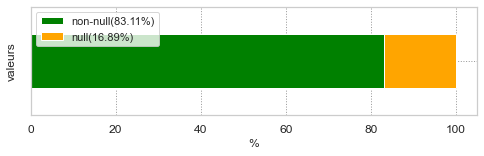

In [3]:
# Vérification de la structure du Data Set
verifier_taille(df15)
afficher_echantillon(df15)

Le data set contient :
	- 3376 lignes et 46 colonnes.
	- 19952 valeurs manquantes, ce qui représente 12.85 % du data set.
Voici un sous-échantillon aléatoire :


OSEBuildingID  DataYear          BuildingType  \
2561          26106      2016  Multifamily LR (1-4)   
1929          23867      2016        NonResidential   

              PrimaryPropertyType           PropertyName  \
2561         Low-Rise Multifamily  Oak Tree Terrace Apts   
1929  Small- and Mid-Sized Office            Airport Way   

                             Address     City State  ZipCode  \
2561  910, 916 & 922 N. 104th Street  Seattle    WA  98133.0   
1929              1700 Airport Way S  Seattle    WA  98134.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode      Neighborhood  \
2561                    6145600515                    5         NORTHWEST   
1929                    7666202855                    2  GREATER DUWAMISH   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
2561  47.70455 -122.34681       1986                1.0               3   
1929  47.58802 -122.32111       1914                1.0               3   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
2561             23346                   0                   23346   
1929             34425                   0                   34425   

               ListOfAllPropertyUseTypes LargestPropertyUseType  \
2561                 Multifamily Housing    Multifamily Housing   
1929  Non-Refrigerated Warehouse, Office                 Office   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
2561                    23346.0                          NaN   
1929                    34425.0   Non-Refrigerated Warehouse   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
2561                              NaN                         NaN   
1929                          15536.0                         NaN   

      ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  \
2561                             NaN                      NaN   
1929                             NaN                      NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
2561             53.0         39.400002           40.599998   
1929             84.0         40.400002           42.900002   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
2561          123.599998            127.599998         9.190487e+05   
1929           94.199997             96.800003         2.018386e+06   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
2561             948550.125             0.0       269357.6875   
1929            2143122.250             0.0       362887.0938   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
2561           919048.0            0.000000               0.0        False   
1929          1238171.0         7802.150391          780215.0        False   

      Comments ComplianceStatus Outlier  TotalGHGEmissions  \
2561       NaN        Compliant     NaN               6.41   
1929       NaN        Compliant     NaN              50.07   

      GHGEmissionsIntensity  
2561                   0.27  
1929                   1.45

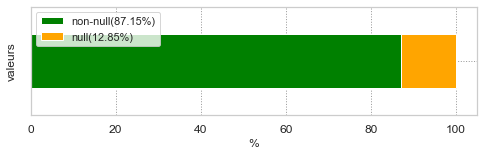

In [4]:
# Vérification de la structure du Data Set
verifier_taille(df16)
afficher_echantillon(df16)

# 1- Nettoyage des Données

## 1.1- Filtrage Colonnes

### 1.1.1- Colonnes Vides

In [5]:
nans = nan_cols(df15, 1)
nans # Affichage des colonnes vides trouvées

Column  #NaN   %NaN  #Not_NaN  %Not_NaN
0         ListOfAllPropertyUseTypes   127   3.80      3213     96.20
1            LargestPropertyUseType   136   4.07      3204     95.93
2         LargestPropertyUseTypeGFA   136   4.07      3204     95.93
3      SecondLargestPropertyUseType  1781  53.32      1559     46.68
4   SecondLargestPropertyUseTypeGFA  1781  53.32      1559     46.68
5       ThirdLargestPropertyUseType  2780  83.23       560     16.77
6    ThirdLargestPropertyUseTypeGFA  2780  83.23       560     16.77
7          YearsENERGYSTARCertified  3230  96.71       110      3.29
8                   ENERGYSTARScore   780  23.35      2560     76.65
9                           Comment  3327  99.61        13      0.39
10                          Outlier  3256  97.49        84      2.51
11               2010 Census Tracts  3116  93.29       224      6.71
12           City Council Districts  3127  93.62       213      6.38

In [6]:
nans = nan_cols(df16, 1) 
nans # Affichage des colonnes vides trouvées

Column  #NaN    %NaN  #Not_NaN  %Not_NaN
0     SecondLargestPropertyUseType  1697   50.27      1679     49.73
1  SecondLargestPropertyUseTypeGFA  1697   50.27      1679     49.73
2      ThirdLargestPropertyUseType  2780   82.35       596     17.65
3   ThirdLargestPropertyUseTypeGFA  2780   82.35       596     17.65
4         YearsENERGYSTARCertified  3257   96.48       119      3.52
5                  ENERGYSTARScore   843   24.97      2533     75.03
6                         Comments  3376  100.00         0      0.00
7                          Outlier  3344   99.05        32      0.95

### 1.1.2- Sélection des Colonnes Pertinentes

In [7]:
Cols = ['OSEBuildingID',	'BuildingType',	'PrimaryPropertyType',	'PropertyGFATotal', 'LargestPropertyUseType', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 	'Neighborhood', 'CouncilDistrictCode', 'YearBuilt',	'NumberofBuildings',	'NumberofFloors', 'ComplianceStatus', 'Outlier']

df15s = df15[Cols]
df15s = renameCol(df15s, 'SteamUse(kBtu)', 'SteamUse')
df15s = renameCol(df15s, 'Electricity(kBtu)', 'Electricity')
df15s = renameCol(df15s, 'NaturalGas(kBtu)', 'NaturalGas')
df15s = renameCol(df15s, 'SiteEnergyUseWN(kBtu)', 'TotalEnergy_2015')
df15s = renameCol(df15s, 'GHGEmissions(MetricTonsCO2e)', 'TotalEmission_2015')

df15s.head(2)

OSEBuildingID    BuildingType PrimaryPropertyType  PropertyGFATotal  \
0              1  NonResidential               Hotel             88434   
1              2  NonResidential               Hotel            103566   

  LargestPropertyUseType   SteamUse  Electricity  NaturalGas  ENERGYSTARScore  \
0                  Hotel  2023032.0    3686160.0   1272388.0             65.0   
1                  Hotel        0.0    3905411.0   4448985.0             51.0   

   TotalEnergy_2015  TotalEmission_2015 Neighborhood  CouncilDistrictCode  \
0         7097539.0              249.43     DOWNTOWN                    7   
1         8765788.0              263.51     DOWNTOWN                    7   

   YearBuilt  NumberofBuildings  NumberofFloors ComplianceStatus Outlier  
0       1927                  1            12.0        Compliant     NaN  
1       1996                  1            11.0        Compliant     NaN

In [8]:
Cols = ['OSEBuildingID',	'BuildingType',	'PrimaryPropertyType',	'PropertyGFATotal', 'LargestPropertyUseType', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 	'Neighborhood', 'CouncilDistrictCode', 'YearBuilt',	'NumberofBuildings',	'NumberofFloors', 'ComplianceStatus', 'Outlier']
 
df16s = df16[Cols]
df16s = renameCol(df16s, 'SteamUse(kBtu)', 'SteamUse')
df16s = renameCol(df16s, 'Electricity(kBtu)', 'Electricity')
df16s = renameCol(df16s, 'NaturalGas(kBtu)', 'NaturalGas')
df16s = renameCol(df16s, 'SiteEnergyUseWN(kBtu)', 'TotalEnergy_2016')
df16s = renameCol(df16s, 'TotalGHGEmissions', 'TotalEmission_2016')
df16s.head(2)

OSEBuildingID    BuildingType PrimaryPropertyType  PropertyGFATotal  \
0              1  NonResidential               Hotel             88434   
1              2  NonResidential               Hotel            103566   

  LargestPropertyUseType   SteamUse  Electricity  NaturalGas  ENERGYSTARScore  \
0                  Hotel  2003882.0    3946027.0   1276453.0             60.0   
1                  Hotel        0.0    3242851.0   5145082.0             61.0   

   TotalEnergy_2016  TotalEmission_2016 Neighborhood  CouncilDistrictCode  \
0         7456910.0              249.98     DOWNTOWN                    7   
1         8664479.0              295.86     DOWNTOWN                    7   

   YearBuilt  NumberofBuildings  NumberofFloors ComplianceStatus Outlier  
0       1927                1.0              12        Compliant     NaN  
1       1996                1.0              11        Compliant     NaN

## 1.2- Agrégation des Données 2015 & 2016

Le data set contient :
	- 3432 lignes et 18 colonnes.
	- 4336 valeurs manquantes, ce qui représente 7.02 % du data set.
Voici un sous-échantillon aléatoire :


OSEBuildingID          BuildingType   PrimaryPropertyType  \
1258          21367        NonResidential      Worship Facility   
2992          27774  Multifamily LR (1-4)  Low-Rise Multifamily   

      PropertyGFATotal LargestPropertyUseType    SteamUse  Electricity  \
1258             37796       Worship Facility  1379517.75     883838.0   
2992            183524    Multifamily Housing        0.00    3085505.0   

      NaturalGas  ENERGYSTARScore Neighborhood  CouncilDistrictCode  \
1258    202628.0             55.0         EAST                    7   
2992         0.0              NaN    NORTHWEST                    6   

      YearBuilt  NumberofBuildings  NumberofFloors ComplianceStatus Outlier  \
1258       1962                1.0             3.0        Compliant     NaN   
2992       2002                1.0             4.0        Compliant     NaN   

      TotalEnergy  TotalEmission  
1258   3032795.00        131.905  
2992   3169721.75         21.210

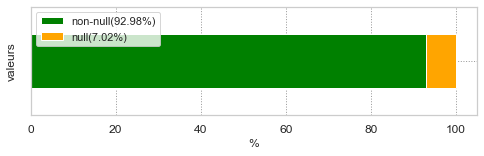

In [9]:
# Jointure des data sets 2015 & 2016 
df = pd.merge(df16s, df15s[['OSEBuildingID', 'TotalEnergy_2015', 'TotalEmission_2015']], how='left', on=['OSEBuildingID'])
df = pd.concat([df, df15s[~df15s['OSEBuildingID'].isin(df16s['OSEBuildingID'])]], axis=0)


# Agrégation des colonnes TotalEnergy & TotalEmission de 2015 & 2016 grâce à la médiane
df['TotalEnergy'] = df[['TotalEnergy_2015','TotalEnergy_2016']].median(axis=1)
df['TotalEmission'] = df[['TotalEmission_2015','TotalEmission_2016']].median(axis=1)

df = df.drop(columns=['TotalEnergy_2015', 'TotalEmission_2015', 'TotalEnergy_2016', 'TotalEmission_2016'])

df = df.reset_index(drop=True)

verifier_taille(df)
afficher_echantillon(df)

## 1.3- Nettoyage des Catégories

In [10]:
categories = colsOfType(df, 'object')
categories

['BuildingType',
 'PrimaryPropertyType',
 'LargestPropertyUseType',
 'Neighborhood',
 'ComplianceStatus',
 'Outlier']

In [11]:
for categorie in categories[:-2]:
    print('------------', categorie, '------------')
    print(df[categorie].sort_values().unique())

------------ BuildingType ------------
['Campus' 'Multifamily HR (10+)' 'Multifamily LR (1-4)'
 'Multifamily MR (5-9)' 'NonResidential' 'Nonresidential COS'
 'Nonresidential WA' 'SPS-District K-12']
------------ PrimaryPropertyType ------------
['Distribution Center' 'High-Rise Multifamily' 'Hospital' 'Hotel'
 'K-12 School' 'Laboratory' 'Large Office' 'Low-Rise Multifamily'
 'Medical Office' 'Mid-Rise Multifamily' 'Mixed Use Property'
 'Non-Refrigerated Warehouse' 'Office' 'Other' 'Refrigerated Warehouse'
 'Residence Hall' 'Restaurant' 'Restaurant\n' 'Retail Store'
 'Self-Storage Facility' 'Senior Care Community'
 'Small- and Mid-Sized Office' 'Supermarket / Grocery Store' 'University'
 'Warehouse' 'Worship Facility']
------------ LargestPropertyUseType ------------
['Adult Education' 'Automobile Dealership' 'Bank Branch'
 'College/University' 'Convention Center' 'Courthouse' 'Data Center'
 'Distribution Center' 'Financial Office' 'Fire Station'
 'Fitness Center/Health Club/Gym' 'Food 

In [12]:
df['PrimaryPropertyType'] = df['PrimaryPropertyType'].replace('Restaurant\n', 'Restaurant')
df['PrimaryPropertyType'].sort_values().unique()

array(['Distribution Center', 'High-Rise Multifamily', 'Hospital',
       'Hotel', 'K-12 School', 'Laboratory', 'Large Office',
       'Low-Rise Multifamily', 'Medical Office', 'Mid-Rise Multifamily',
       'Mixed Use Property', 'Non-Refrigerated Warehouse', 'Office',
       'Other', 'Refrigerated Warehouse', 'Residence Hall', 'Restaurant',
       'Retail Store', 'Self-Storage Facility', 'Senior Care Community',
       'Small- and Mid-Sized Office', 'Supermarket / Grocery Store',
       'University', 'Warehouse', 'Worship Facility'], dtype=object)

In [13]:
nan_index = df[df['LargestPropertyUseType'].isnull()].index
nan_index
df.iloc[nan_index, df.columns.get_loc('LargestPropertyUseType')] = df.iloc[nan_index, df.columns.get_loc('PrimaryPropertyType')]

df['LargestPropertyUseType'].sort_values().unique()

array(['Adult Education', 'Automobile Dealership', 'Bank Branch',
       'College/University', 'Convention Center', 'Courthouse',
       'Data Center', 'Distribution Center', 'Financial Office',
       'Fire Station', 'Fitness Center/Health Club/Gym', 'Food Service',
       'High-Rise Multifamily', 'Hospital (General Medical & Surgical)',
       'Hotel', 'K-12 School', 'Laboratory', 'Library',
       'Lifestyle Center', 'Low-Rise Multifamily',
       'Manufacturing/Industrial Plant', 'Medical Office',
       'Mid-Rise Multifamily', 'Mixed Use Property', 'Movie Theater',
       'Multifamily Housing', 'Museum', 'Non-Refrigerated Warehouse',
       'Office', 'Other', 'Other - Education',
       'Other - Entertainment/Public Assembly',
       'Other - Lodging/Residential', 'Other - Mall',
       'Other - Public Services', 'Other - Recreation',
       'Other - Restaurant/Bar', 'Other - Services', 'Other - Utility',
       'Other/Specialty Hospital',
       'Outpatient Rehabilitation/Physica

In [14]:
df = df.drop(columns=['PrimaryPropertyType'])

In [15]:
df['Neighborhood'] = df['Neighborhood'].str.capitalize()
df['Neighborhood'].sort_values().unique()

array(['Ballard', 'Central', 'Delridge', 'Delridge neighborhoods',
       'Downtown', 'East', 'Greater duwamish', 'Lake union',
       'Magnolia / queen anne', 'North', 'Northeast', 'Northwest',
       'Southeast', 'Southwest'], dtype=object)

## 1.4- Filtrage Lignes

### 1.4.1- Doublons

In [16]:
doublons(df15['OSEBuildingID'])

Series([], Name: OSEBuildingID, dtype: int64)

In [17]:
doublons(df16['OSEBuildingID'])

Series([], Name: OSEBuildingID, dtype: int64)

### 1.4.2- Valeurs Manquantes

In [18]:
nan_cols(df, 0.01)

Column  #NaN   %NaN  #Not_NaN  %Not_NaN
0           SteamUse    10   0.29      3422     99.71
1        Electricity    10   0.29      3422     99.71
2         NaturalGas    10   0.29      3422     99.71
3    ENERGYSTARScore   858  25.00      2574     75.00
4  NumberofBuildings     8   0.23      3424     99.77
5            Outlier  3397  98.98        35      1.02
6        TotalEnergy     3   0.09      3429     99.91
7      TotalEmission     4   0.12      3428     99.88

In [19]:
nans = valeurs_manquantes(df[['LargestPropertyUseType', 'SteamUse', 'Electricity', 'NaturalGas', 'NumberofBuildings', 'TotalEnergy',	'TotalEmission']])
df.iloc[nans.index, :].head(2)

OSEBuildingID          BuildingType  PropertyGFATotal  \
578            773        NonResidential             63150   
758          19798  Multifamily LR (1-4)             33166   

          LargestPropertyUseType  SteamUse  Electricity  NaturalGas  \
578  Small- and Mid-Sized Office       NaN          NaN         NaN   
758         Low-Rise Multifamily       NaN          NaN         NaN   

     ENERGYSTARScore Neighborhood  CouncilDistrictCode  YearBuilt  \
578              NaN     Downtown                    7       1924   
758              NaN    Northeast                    4       1977   

     NumberofBuildings  NumberofFloors ComplianceStatus Outlier  TotalEnergy  \
578                NaN             4.0    Non-Compliant     NaN    2982178.0   
758                NaN             3.0    Non-Compliant     NaN          NaN   

     TotalEmission  
578          35.69  
758            NaN

In [20]:
df = df.drop(index=nans.index)

### 1.4.3- Bâtiments Non Confomres

In [21]:
df[df['ComplianceStatus']=='Not Compliant']
df = df.drop(columns=['ComplianceStatus'])

### 1.4.4- Imputation de l'ENERGYSTARScore

#### 1.4.4.1- Evaluation & Calibrage de l'Imputation KNN

In [22]:
df_ENERGYSTARScore = df[df['ENERGYSTARScore'].notnull()][colsOfType(df)[1:]]
# df_ENERGYSTARScore = Robust_Scaled(df_ENERGYSTARScore, frame=True)

data_size = len(df_ENERGYSTARScore)
test_sample_size = int(data_size*0.2)
test_sample = np.random.randint(data_size, size=test_sample_size)
test_sample = sorted(test_sample)

test_data = df_ENERGYSTARScore.iloc[test_sample]['ENERGYSTARScore']#.copy()
# df_ENERGYSTARScore.iloc[test_sample, df.columns.get_loc('ENERGYSTARScore')] = np.nan

In [23]:
test_data

4        75.0
9         1.0
63       48.0
64       71.0
67       96.0
        ...  
3395     79.0
3426     64.0
3429     50.0
3430    100.0
3430    100.0
Name: ENERGYSTARScore, Length: 514, dtype: float64

In [24]:
best_k = 0
best_score = 100
for k in range(1,50):
    imp = KNNImputer(n_neighbors=k, weights='uniform')
    imputed_data = imp.fit_transform(df_ENERGYSTARScore)
    score = np.sqrt((test_data - imputed_data[test_sample, df.columns.get_loc('ENERGYSTARScore')])**2).mean()
    if score < best_score:
        best_score = score
        best_k = k
print(best_k, ':', best_score)

1 : 68.1284046692607


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 20}
RMSE : 24.05
R² : 0.23


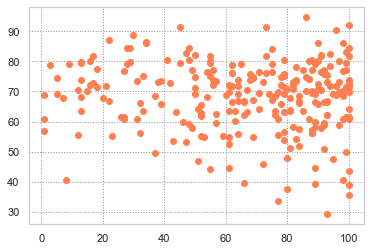

In [25]:
best_rmse = 100
best_r2 = 0
best_regr = None
best_predict = None

for i in range(10):
    X_train, X_test, y_train, y_test = trainning_sets(df_ENERGYSTARScore, 'ENERGYSTARScore', train_size=0.9, scale='robust')

    # Fixer les valeurs des hyperparamètres à tester
    param_grid = {'n_neighbors':list(range(3,100)) }

    # Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
    score = 'r2'

    # Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
    regr = RandomizedSearchCV(
        KNeighborsRegressor(), # un classifieur kNN
        param_grid,     # hyperparamètres à tester
        cv=10,           # nombre de folds de validation croisée
        scoring=score,   # score à optimiser
        n_jobs=-1
    )

    # Optimiser ce classifieur sur le jeu d'entraînement
    regr.fit(X_train, y_train)        
    y_pred = regr.predict(X_test)

    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2 = np.abs(metrics.r2_score(y_test, y_pred))

    if r2 > best_r2:
        best_rmse = rmse
        best_r2 = r2
        best_regr = regr
        best_predict = y_pred

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(best_regr.best_params_)
print("RMSE : {:.2f}".format(best_rmse))
print("R² : {:.2f}".format(best_r2))
plt.scatter(y_test, best_predict, color='coral')

In [26]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=1000, tol=1e-12, verbose=2)
imputed_data = imp.fit_transform(df_ENERGYSTARScore)
score = np.sqrt((test_data - imputed_data[test_sample, df.columns.get_loc('ENERGYSTARScore')])**2).mean()
score

[IterativeImputer] Completing matrix with shape (2574, 11)
[IterativeImputer] Ending imputation round 1/1000, elapsed time 0.05
[IterativeImputer] Change: 0.0, scaled tolerance: 0.000471613856 
[IterativeImputer] Early stopping criterion reached.


68.1284046692607

In [27]:
imputed_data[test_sample,df.columns.get_loc('ENERGYSTARScore')+1]

array([18.,  6.,  3.,  7.,  5., 12.,  3.,  1.,  3.,  3.,  2.,  1.,  3.,
        2.,  3.,  2.,  4.,  4., 10.,  7.,  8., 29.,  5.,  5.,  5., 11.,
       42.,  1., 14., 56., 11.,  4.,  3.,  6.,  5.,  4.,  5.,  5.,  7.,
        7., 10.,  1.,  1.,  1.,  1.,  2.,  1.,  5.,  5.,  1.,  7.,  6.,
        1.,  4.,  7.,  5.,  1.,  4.,  3.,  5.,  5.,  4.,  3.,  5.,  8.,
       11., 33., 76., 10., 13.,  7.,  3., 42.,  6.,  6.,  2.,  1.,  3.,
        1.,  4.,  4.,  1.,  2.,  3.,  6.,  4.,  3.,  4.,  4.,  4.,  5.,
        5.,  4.,  3.,  2.,  2.,  3.,  2., 26.,  7., 31.,  4.,  6.,  6.,
        6.,  3., 18., 18.,  4.,  4.,  4.,  4.,  5.,  4.,  4.,  1.,  3.,
        2.,  6.,  3.,  4., 37.,  2.,  3.,  8.,  3.,  4.,  7.,  6.,  4.,
        4.,  3.,  4.,  3.,  6.,  6.,  3.,  4.,  5.,  1.,  1.,  4.,  1.,
        4.,  5.,  1.,  1.,  3.,  3.,  3., 33.,  4.,  3.,  6.,  6.,  4.,
        2.,  4.,  1.,  2.,  2.,  1.,  6.,  5.,  2., 10.,  4.,  5.,  2.,
        3.,  1.,  4.,  2.,  2.,  4.,  3.,  5.,  6.,  2.,  4.,  7

In [28]:
imp = KNNImputer(n_neighbors=10, weights='distance')
imp.fit_transform(df[colsOfType(df)[1:]])

array([[8.8434000e+04, 2.0038820e+06, 3.9460270e+06, ..., 1.2000000e+01,
        7.2772245e+06, 2.4970500e+02],
       [1.0356600e+05, 0.0000000e+00, 3.2428510e+06, ..., 1.1000000e+01,
        8.7151335e+06, 2.7968500e+02],
       [9.5611000e+05, 2.1566554e+07, 4.9526664e+07, ..., 4.1000000e+01,
        7.4721692e+07, 2.0753800e+03],
       ...,
       [4.0940000e+04, 0.0000000e+00, 1.2506440e+06, ..., 4.0000000e+00,
        1.3248910e+06, 8.7200000e+00],
       [4.3998000e+04, 0.0000000e+00, 4.2652000e+04, ..., 5.0000000e+00,
        1.2828700e+06, 5.1550000e+01],
       [8.0852000e+05, 0.0000000e+00, 7.6742000e+07, ..., 4.0000000e+00,
        1.6652344e+08, 4.8298600e+03]])

#### 1.4.4.2- Imputation KNN

In [29]:
imp = KNNImputer(n_neighbors=10, weights='distance')
imp.fit_transform(df[colsOfType(df)[1:]])

array([[8.8434000e+04, 2.0038820e+06, 3.9460270e+06, ..., 1.2000000e+01,
        7.2772245e+06, 2.4970500e+02],
       [1.0356600e+05, 0.0000000e+00, 3.2428510e+06, ..., 1.1000000e+01,
        8.7151335e+06, 2.7968500e+02],
       [9.5611000e+05, 2.1566554e+07, 4.9526664e+07, ..., 4.1000000e+01,
        7.4721692e+07, 2.0753800e+03],
       ...,
       [4.0940000e+04, 0.0000000e+00, 1.2506440e+06, ..., 4.0000000e+00,
        1.3248910e+06, 8.7200000e+00],
       [4.3998000e+04, 0.0000000e+00, 4.2652000e+04, ..., 5.0000000e+00,
        1.2828700e+06, 5.1550000e+01],
       [8.0852000e+05, 0.0000000e+00, 7.6742000e+07, ..., 4.0000000e+00,
        1.6652344e+08, 4.8298600e+03]])

In [30]:
df = df[df['ENERGYSTARScore'].notnull()]

### 1.4.5-  Outliers

In [31]:
df.Outlier.unique()

array([nan, 'Low outlier', 'High outlier', 'Low Outlier'], dtype=object)

In [32]:
outliers = df[df['Outlier'].isin(['High Outlier', 'Low Outlier', 'Low Outlier'])]['OSEBuildingID'].values.tolist()
df = df[~df['OSEBuildingID'].isin(outliers)]
df = df.drop(columns=['Outlier'])
outliers

[22446, 24194]

Le data set contient :
	- 2572 lignes et 15 colonnes.
	- 0 valeurs manquantes, ce qui représente 0.0 % du data set.
Voici un sous-échantillon aléatoire :


OSEBuildingID          BuildingType  PropertyGFATotal  \
2174          24663  Multifamily LR (1-4)             45552   
2483          25784  Multifamily LR (1-4)             27328   

     LargestPropertyUseType  SteamUse  Electricity  NaturalGas  \
2174    Multifamily Housing       0.0     831015.0    482636.0   
2483    Multifamily Housing       0.0     233383.0   1183106.0   

      ENERGYSTARScore Neighborhood  CouncilDistrictCode  YearBuilt  \
2174             50.0         East                    3       1924   
2483             73.0         East                    3       1910   

      NumberofBuildings  NumberofFloors   TotalEnergy  TotalEmission  
2174                1.0             3.0  1.428003e+06         31.045  
2483                1.0             3.0  1.564831e+06         61.125

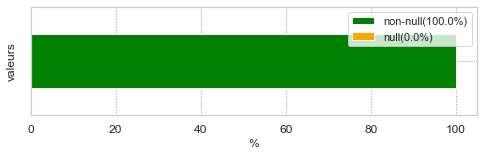

In [33]:
# Vérification de la structure du Data Set
verifier_taille(df)
afficher_echantillon(df)

# 2- Analyse & Transformation des Attributs

In [34]:
classes = ['TotalEnergy', 'TotalEmission']
Attributs = df.columns.tolist()[1:]
for c in classes:
    Attributs.remove(c)

In [35]:
Attributs

['BuildingType',
 'PropertyGFATotal',
 'LargestPropertyUseType',
 'SteamUse',
 'Electricity',
 'NaturalGas',
 'ENERGYSTARScore',
 'Neighborhood',
 'CouncilDistrictCode',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors']

## 2.1- Distributions

In [36]:
df[Attributs].describe()

PropertyGFATotal      SteamUse   Electricity    NaturalGas  \
count      2.572000e+03  2.572000e+03  2.572000e+03  2.572000e+03   
mean       9.610541e+04  2.644952e+05  3.484414e+06  1.272110e+06   
std        1.507797e+05  4.067380e+06  1.020168e+07  7.169420e+06   
min        1.229400e+04  0.000000e+00 -1.154170e+05  0.000000e+00   
25%        2.995150e+04  0.000000e+00  6.669250e+05  0.000000e+00   
50%        4.639650e+04  0.000000e+00  1.191544e+06  2.896575e+05   
75%        9.563325e+04  0.000000e+00  2.781119e+06  1.141872e+06   
max        1.952220e+06  1.349435e+08  2.745325e+08  2.979090e+08   

       ENERGYSTARScore  CouncilDistrictCode    YearBuilt  NumberofBuildings  \
count      2572.000000          2572.000000  2572.000000        2572.000000   
mean         67.979782             4.474339  1969.783048           1.043546   
std          26.790956             2.094176    32.264543           0.597910   
min           1.000000             1.000000  1900.000000           0.000000   
25%          53.000000             3.000000  1952.000000           1.000000   
50%          75.000000             4.000000  1976.000000           1.000000   
75%          90.000000             7.000000  1997.000000           1.000000   
max         100.000000             7.000000  2015.000000          16.000000   

       NumberofFloors  
count     2572.000000  
mean         5.089813  
std          6.008624  
min          0.000000  
25%          3.000000  
50%          4.000000  
75%          5.000000  
max         99.000000

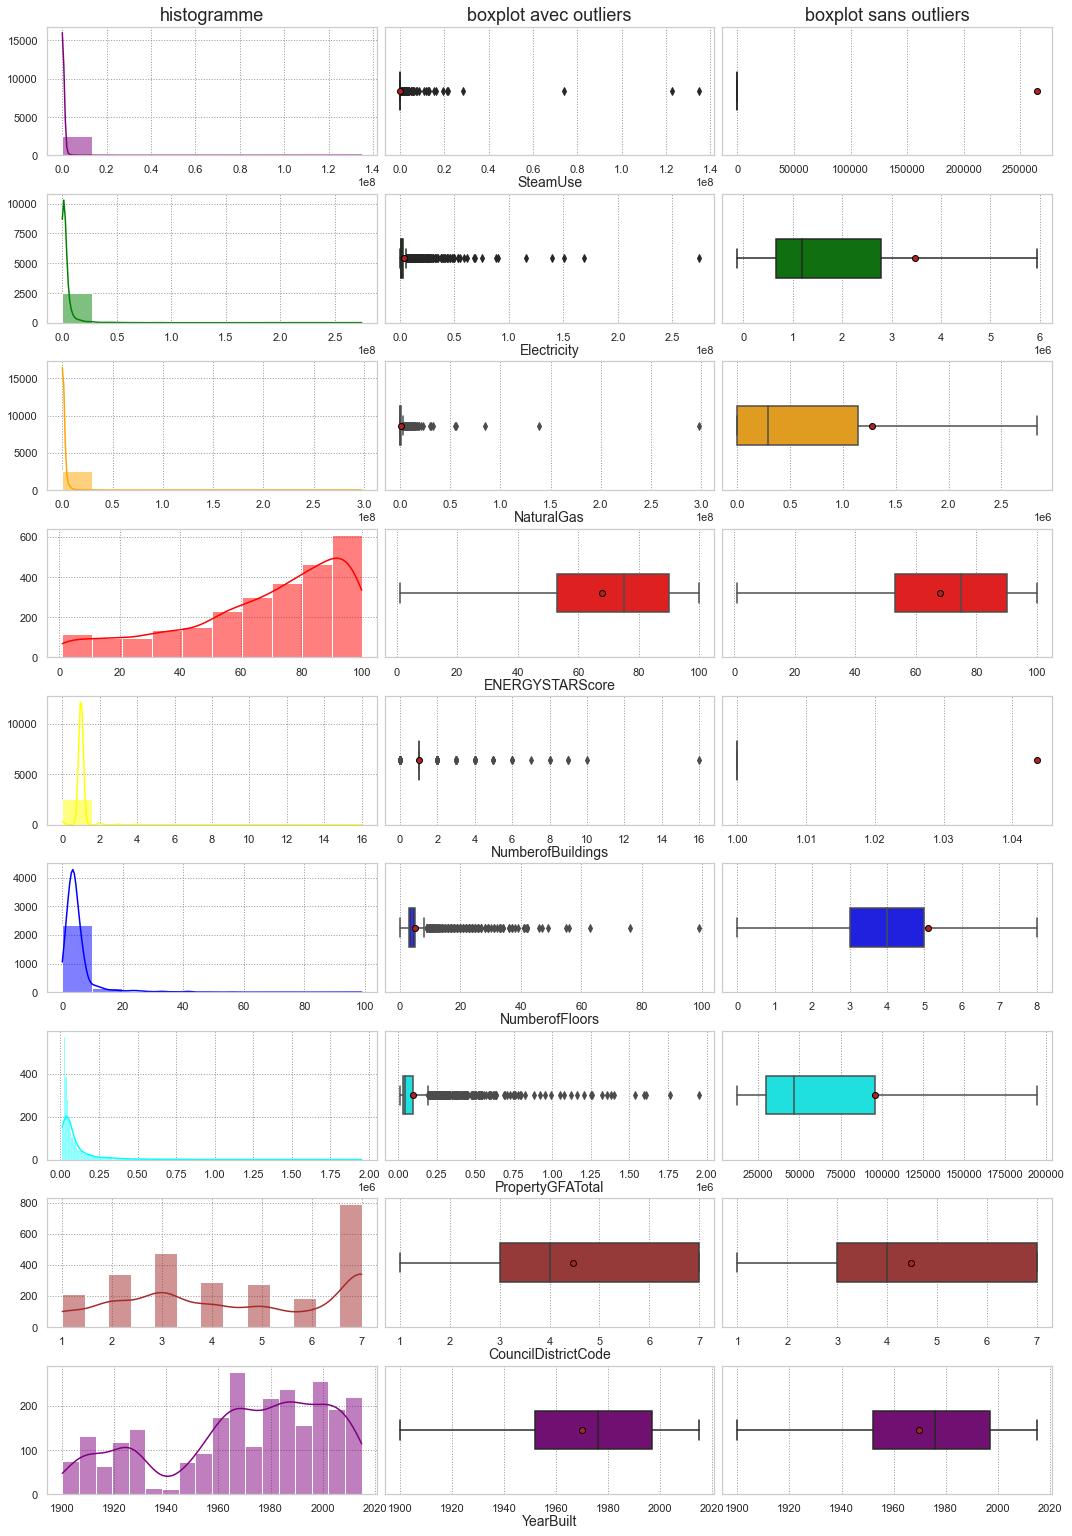

In [37]:
histo_distribution(df[Attributs])

## 2.2- Correlations

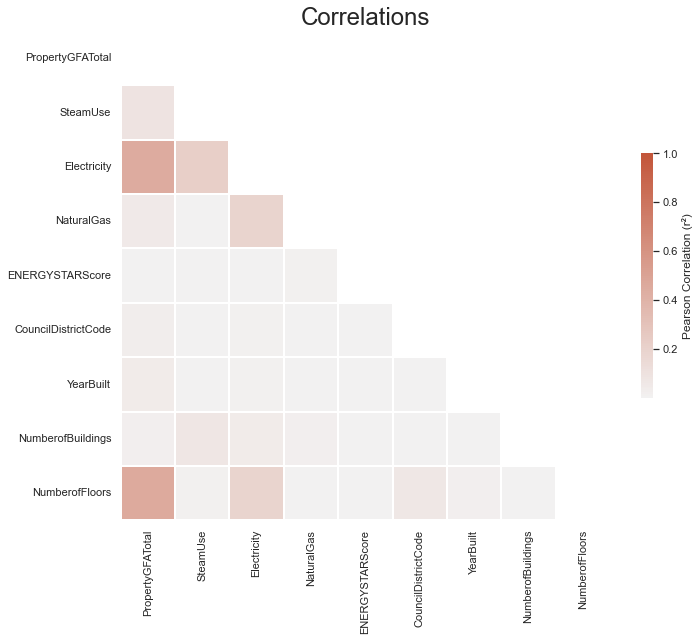

In [38]:
correlation_matrix(df[Attributs])

## 2.3- CHi2

### 2.3.1- BuildingType & LargestPropertyUseType

p-value is:  0.0
chi=4272.956115, critical value=173.004059
At 0.05 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.


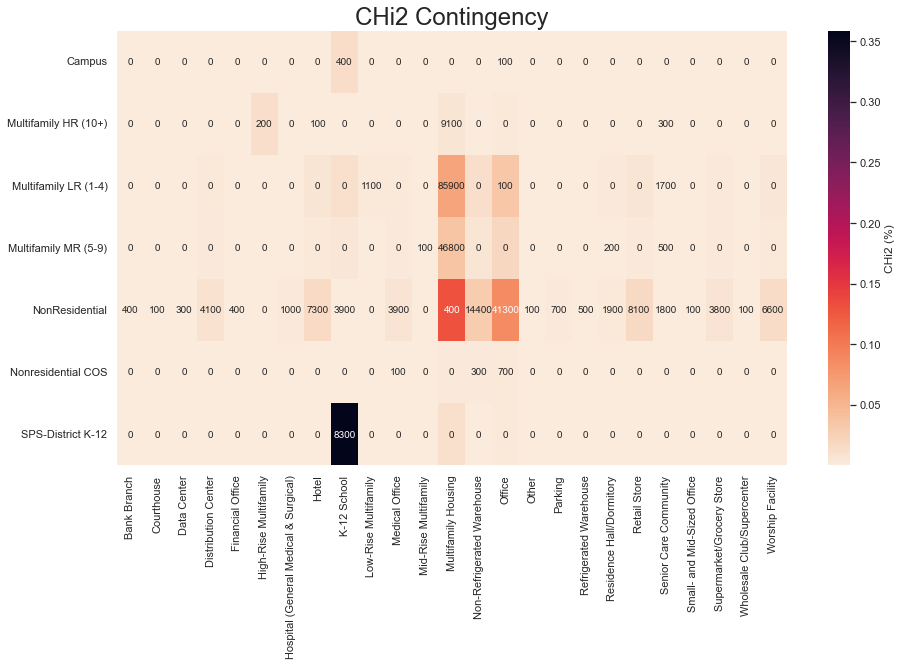

In [39]:
chi2(df, 'BuildingType', 'LargestPropertyUseType')

### 2.3.2- BuildingType & Neighborhood

p-value is:  4.740165781632681e-136
chi=863.866161, critical value=92.808270
At 0.05 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.


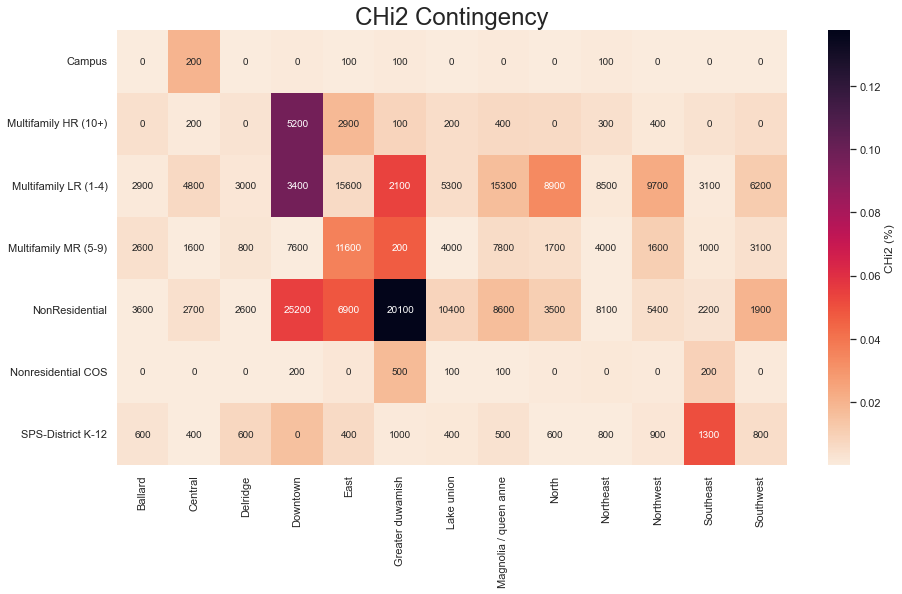

In [40]:
chi2(df, 'BuildingType', 'Neighborhood')

### 2.3.3- LargestPropertyUseType & Neighborhood

p-value is:  6.8413460859247954e-245
chi=1953.443133, critical value=328.580401
At 0.05 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.


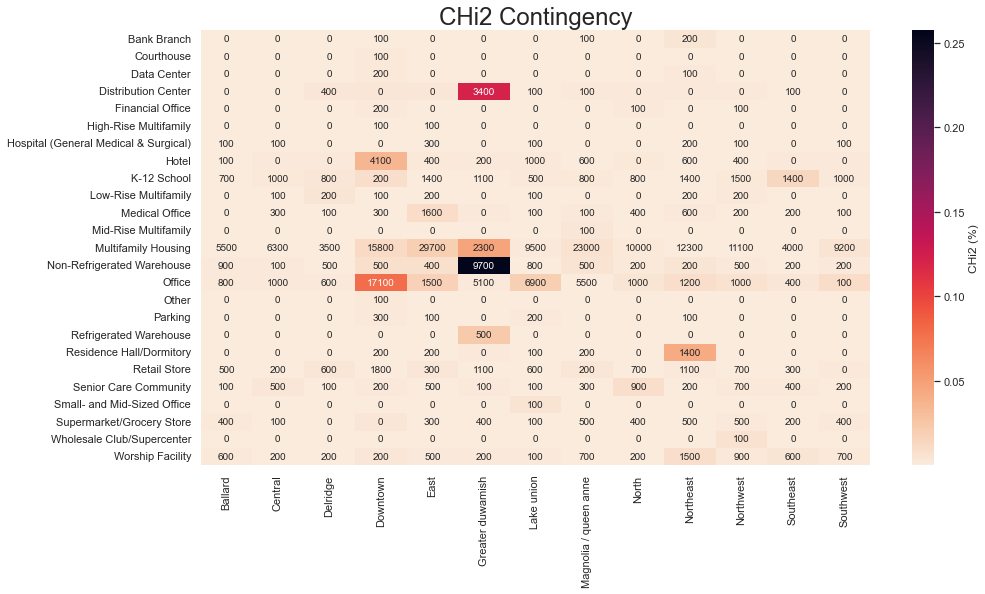

In [41]:
chi2(df, 'LargestPropertyUseType', 'Neighborhood')

## 2.4- ANOVA

### 2.4.1- BuildingType

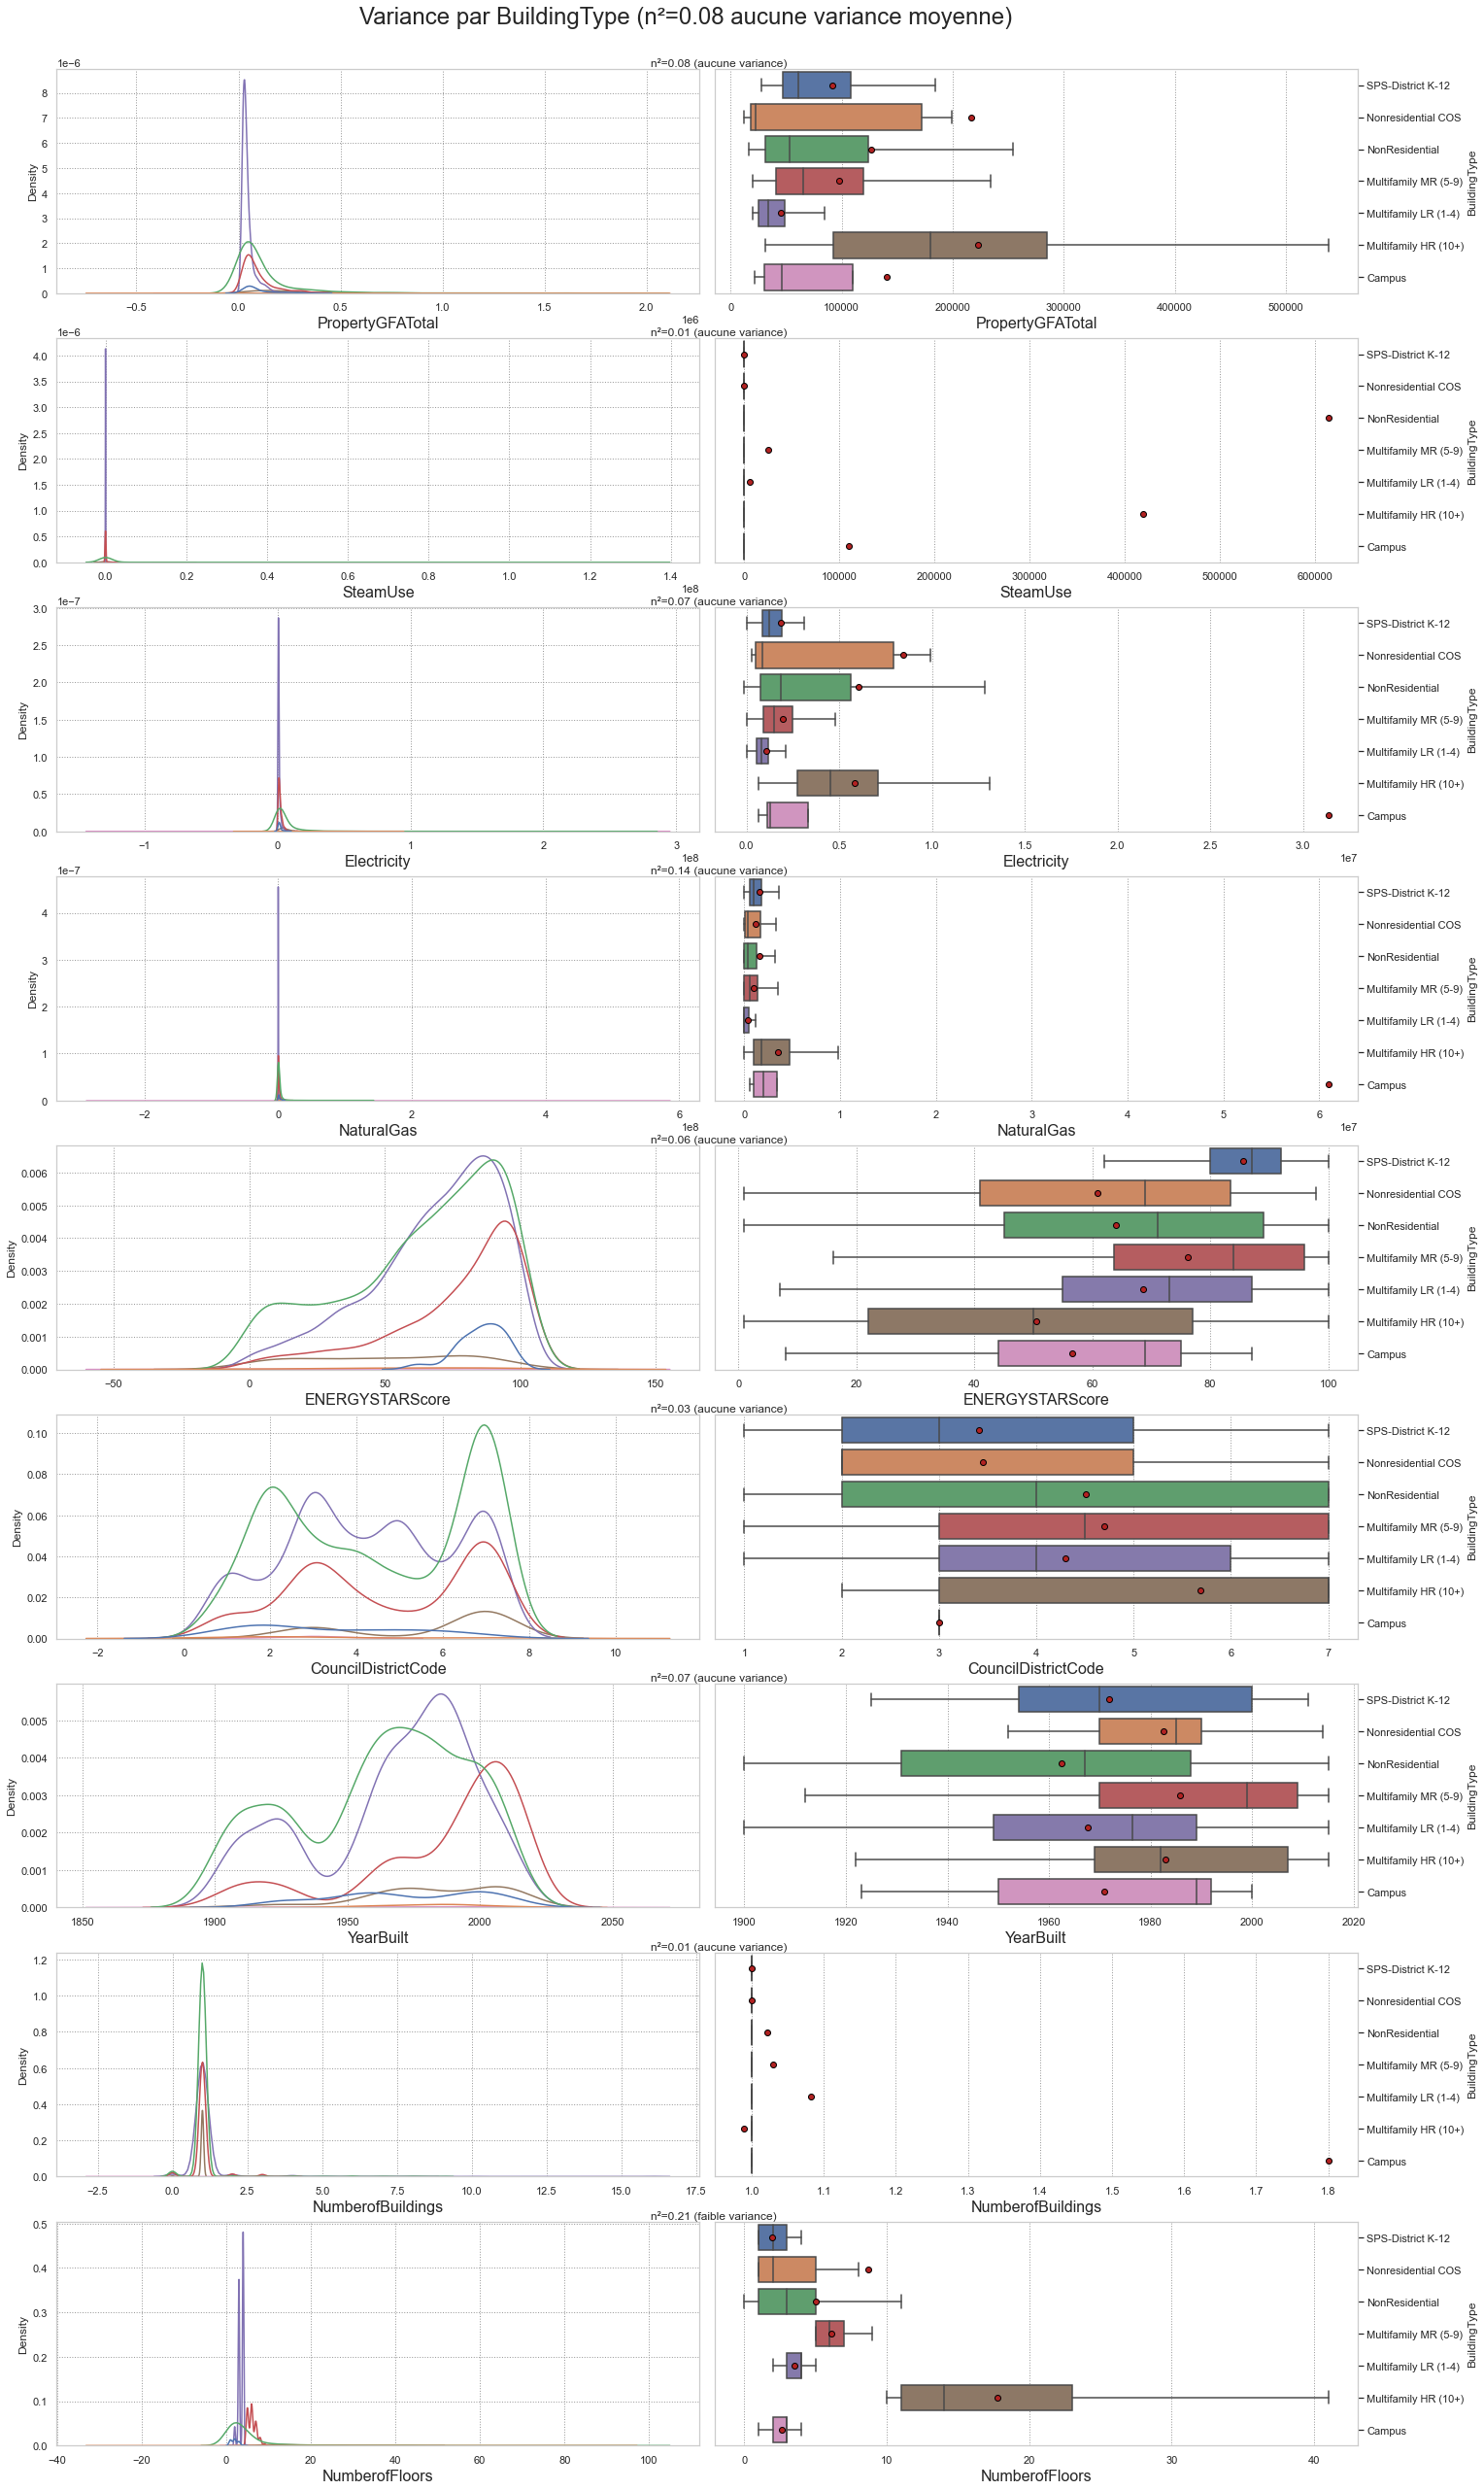

In [42]:
X = 'BuildingType'
ANOVA(df, X, Attributs)

### 2.4.2- LargestPropertyUseType

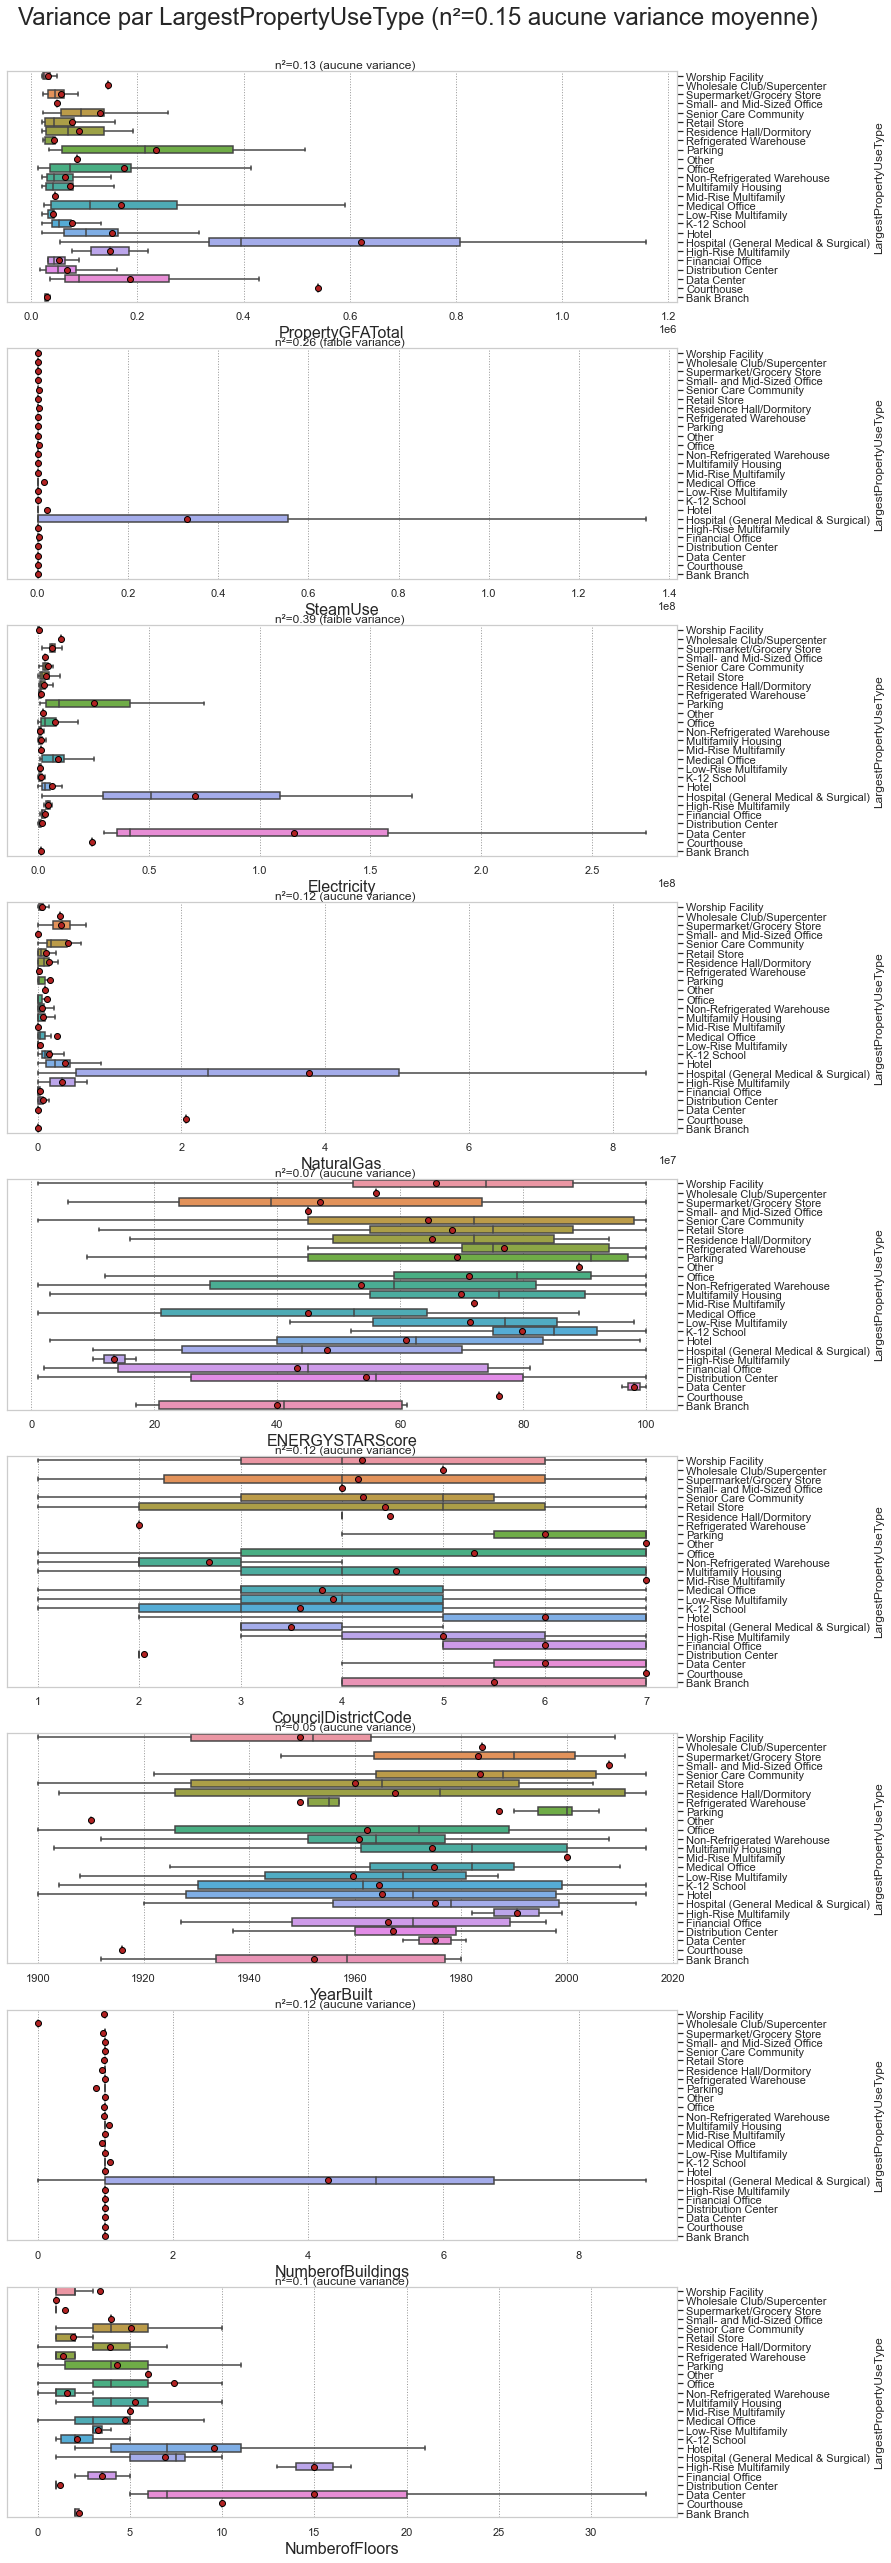

In [43]:
X = 'LargestPropertyUseType'
ANOVA(df, X, Attributs, display_kde=False)

### 2.4.3- Neighborhood

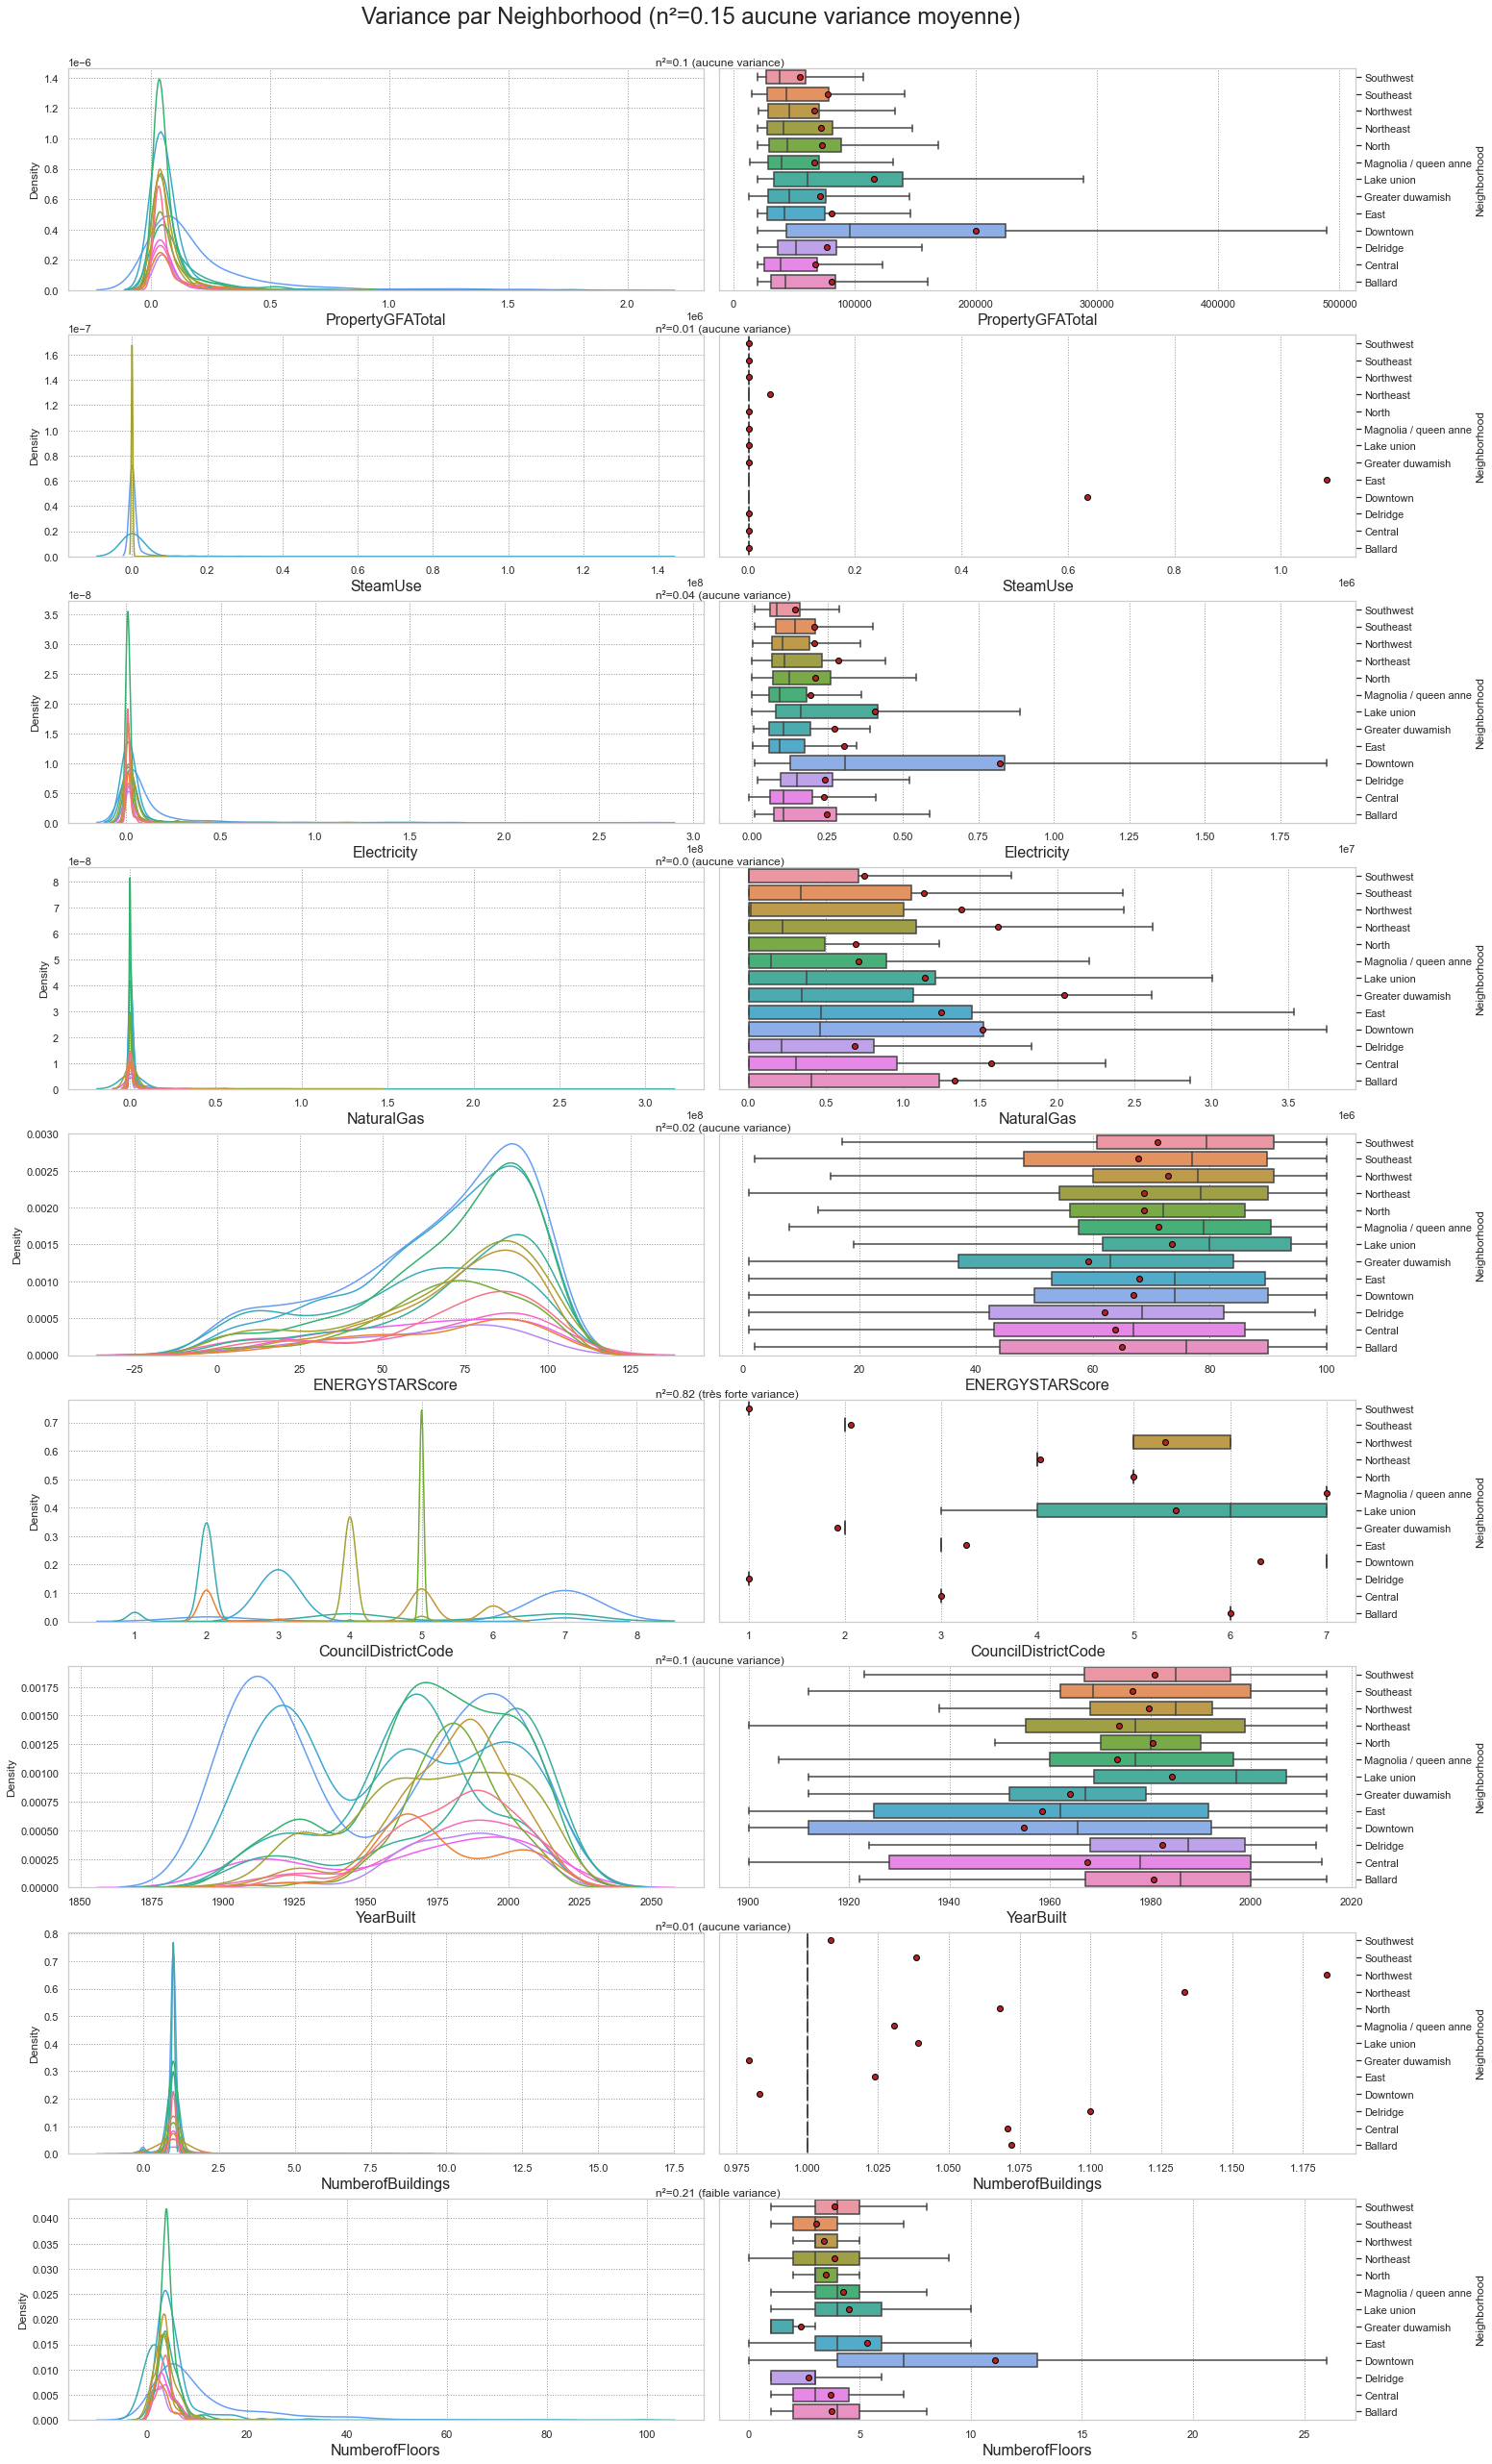

In [44]:
X = 'Neighborhood'
ANOVA(df, X, Attributs)

## 2.5- Encodage des Catégories

In [45]:
categories = colsOfType(df, 'object')
categories.remove('Neighborhood')
# categories = ['BuildingType'] #['LargestPropertyUseType']

### 2.5.1- Binarisation

In [46]:
df['SteamUse'] = df['SteamUse'].apply(lambda x : 1 if x>0 else 0)
df['Electricity'] = df['Electricity'].apply(lambda x : 1 if x>0 else 0)
df['NaturalGas'] = df['NaturalGas'].apply(lambda x : 1 if x>0 else 0)

### 2.5.2- One Hot Encoding

In [47]:
df_categories = df[categories].copy()
df_OHE = pd.get_dummies(df, columns=categories)
df_OHE[categories] = df_categories

### 2.5.3- Label Encoding

In [48]:
df_LE = df.copy()
for categorie in categories:
    df_LE[categorie] = df_LE[categorie].astype('category')
    df_LE[categorie] = df_LE[categorie].cat.codes

In [49]:
afficher_echantillon(df)

Voici un sous-échantillon aléatoire :


OSEBuildingID          BuildingType  PropertyGFATotal  \
1971          23977        NonResidential             41550   
1858          23611  Multifamily LR (1-4)             31379   

      LargestPropertyUseType  SteamUse  Electricity  NaturalGas  \
1971  Refrigerated Warehouse         0            1           0   
1858     Multifamily Housing         0            1           0   

      ENERGYSTARScore      Neighborhood  CouncilDistrictCode  YearBuilt  \
1971             94.0  Greater duwamish                    2       1951   
1858             66.0             North                    5       1993   

      NumberofBuildings  NumberofFloors   TotalEnergy  TotalEmission  
1971                1.0             1.0  545660.59375          3.805  
1858                1.0             4.0  920745.75000          6.015

# 3- Analyse & Transformation des Classes

## 3.1- Distributions

In [50]:
df[classes].describe()

TotalEnergy  TotalEmission
count  2.572000e+03    2572.000000
mean   5.166167e+06     111.200198
std    1.684996e+07     542.083686
min    0.000000e+00       0.090000
25%    1.013777e+06       9.141250
50%    1.933903e+06      32.585000
75%    4.308170e+06      87.140000
max    4.716139e+08   16870.980000

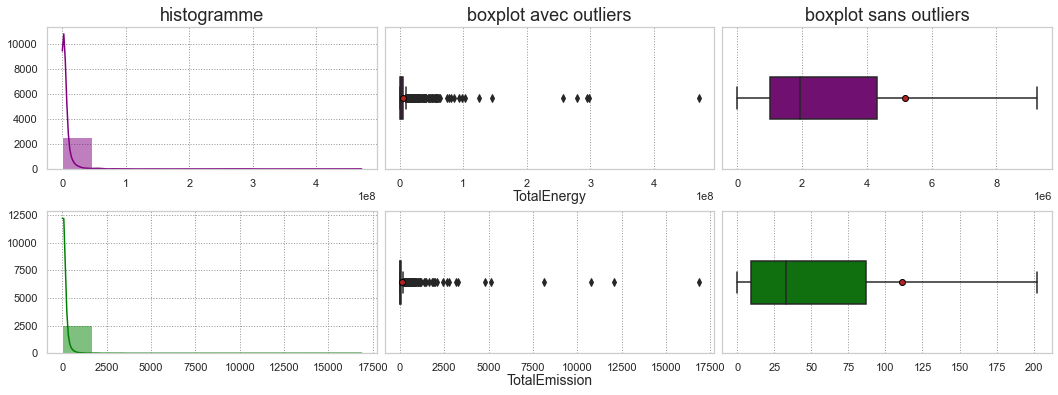

In [51]:
histo_distribution(df[classes])

## 3.2- Equilibrage des Classes

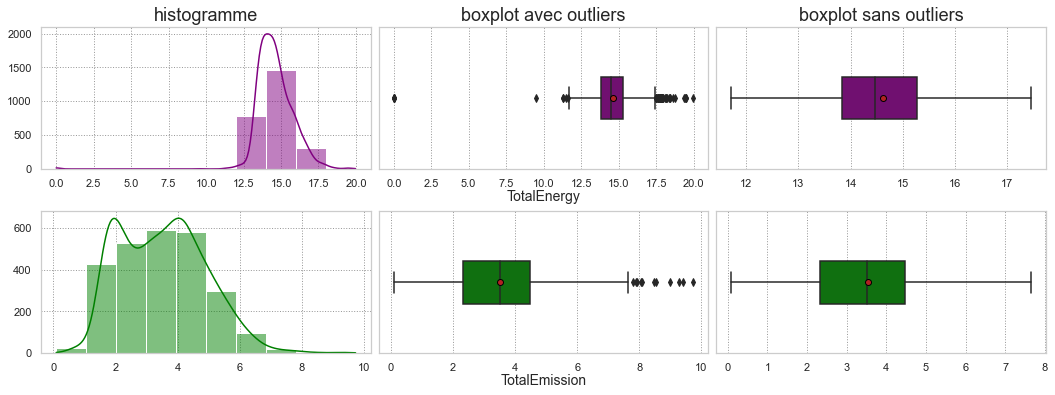

In [52]:
for classe in classes:
    df[classe] = np.log(df[classe]+1)
    df_LE[classe] = np.log(df_LE[classe]+1)
    df_OHE[classe] = np.log(df_OHE[classe]+1)

histo_distribution(df[['TotalEnergy', 'TotalEmission']])

In [53]:
low_outlier = df[(df[classes[0]]<.1) | (df[classes[1]]<.1)]['OSEBuildingID'].values.tolist()
df = df[~df['OSEBuildingID'].isin(low_outlier)]
df_LE = df_LE[~df_LE['OSEBuildingID'].isin(low_outlier)]
df_OHE = df_OHE[~df_OHE['OSEBuildingID'].isin(low_outlier)]
outliers += low_outlier
low_outlier

[20130, 20324, 50014, 50044, 50071, 26938]

## 3.3- Correlations

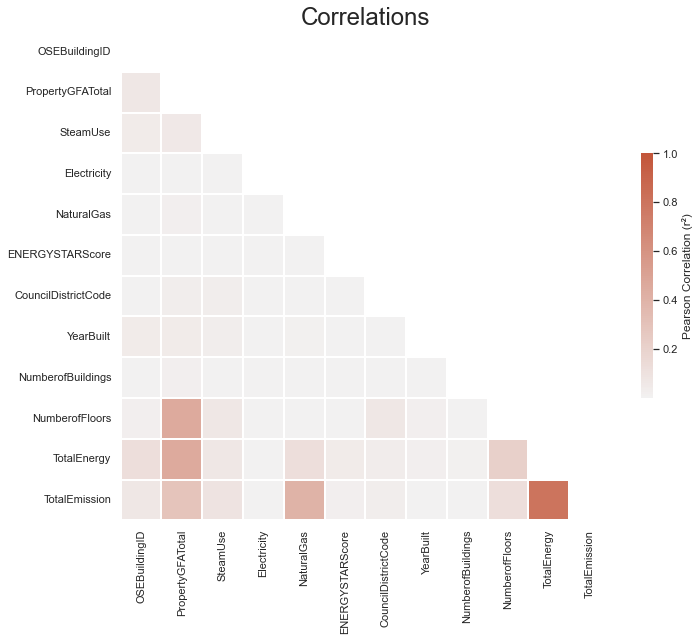

In [54]:
correlation_matrix(df)

## 3.4- ANOVA

### 3.4.1- BuildingType

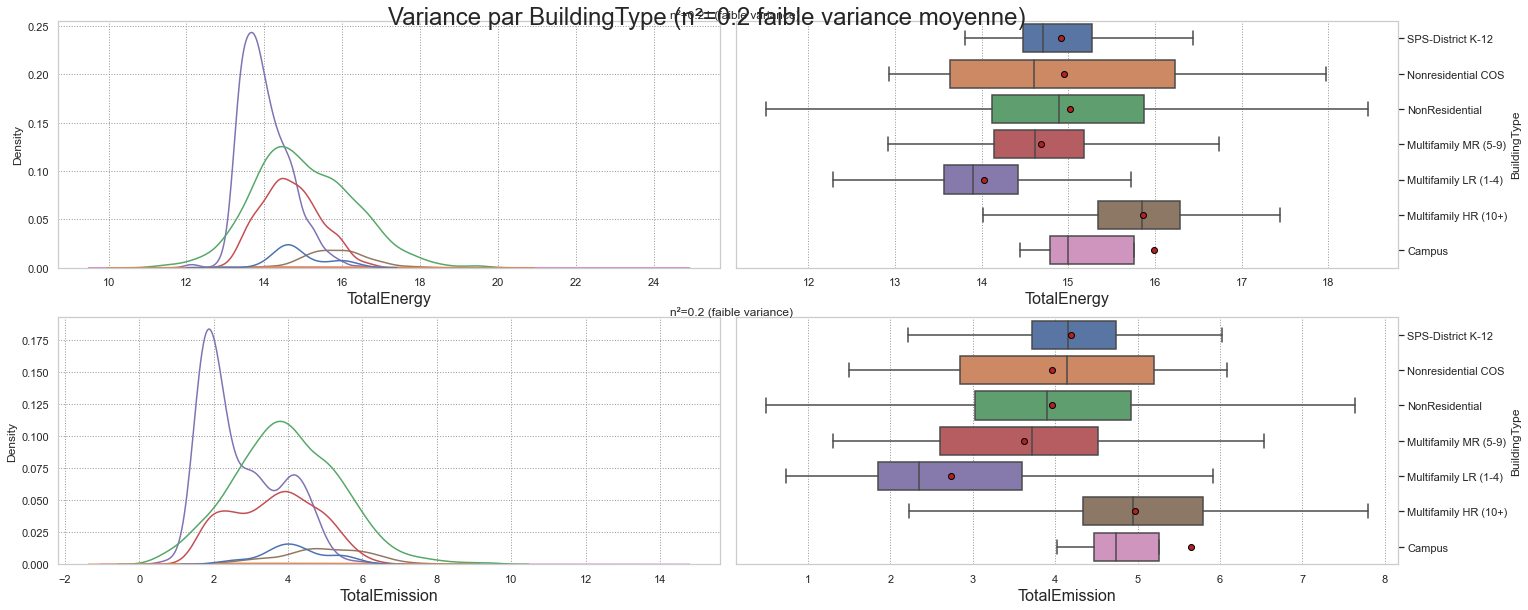

In [55]:
X = 'BuildingType'
ANOVA(df, X, ['TotalEnergy', 'TotalEmission'])

### 3.4.2- LargestPropertyUseType

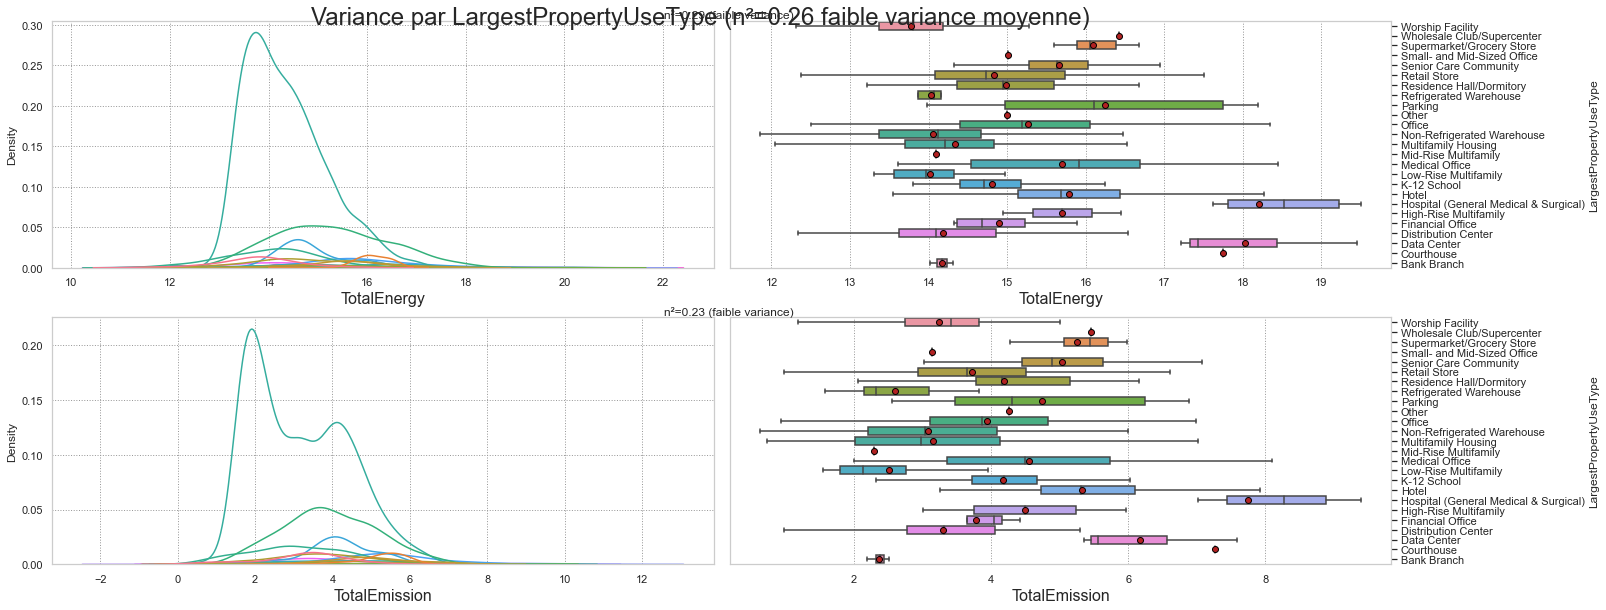

In [56]:
X = 'LargestPropertyUseType'
ANOVA(df, X, ['TotalEnergy', 'TotalEmission'])

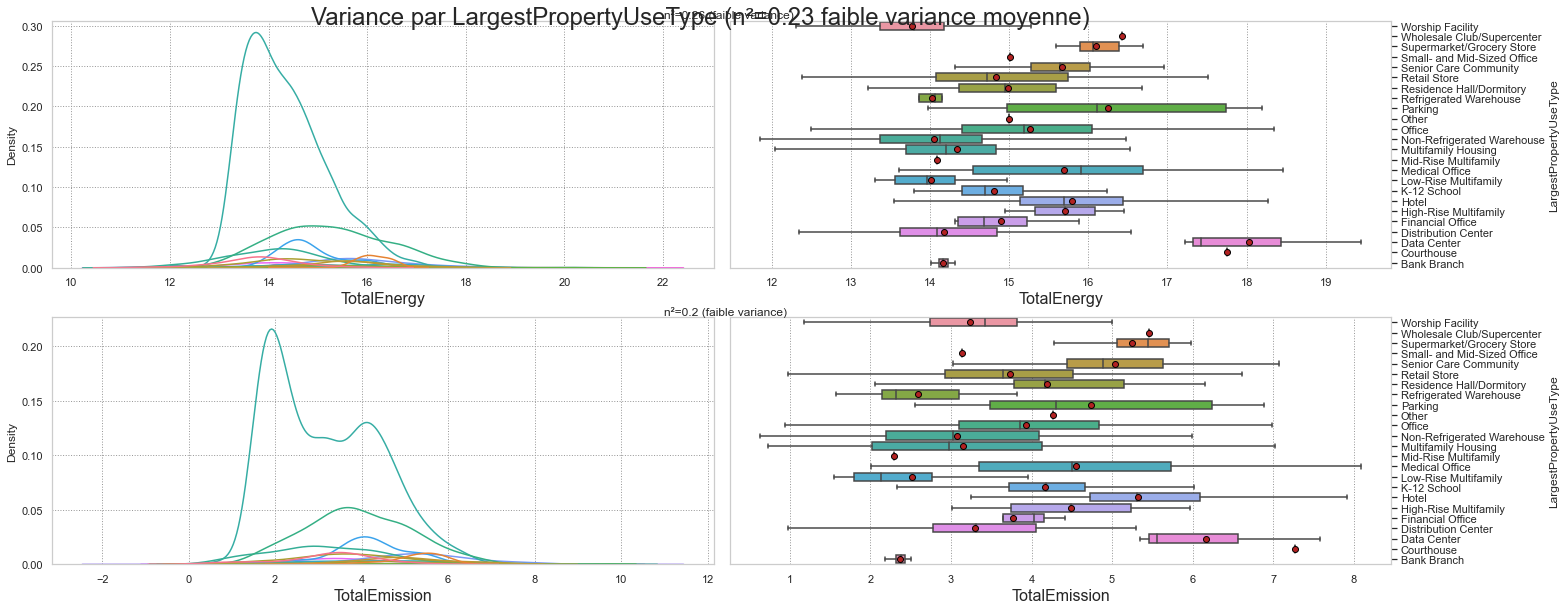

In [57]:
X = 'LargestPropertyUseType'
ANOVA(df[df['LargestPropertyUseType']!='Hospital (General Medical & Surgical)'], X, ['TotalEnergy', 'TotalEmission'])

### 3.4.3- Neighborhood

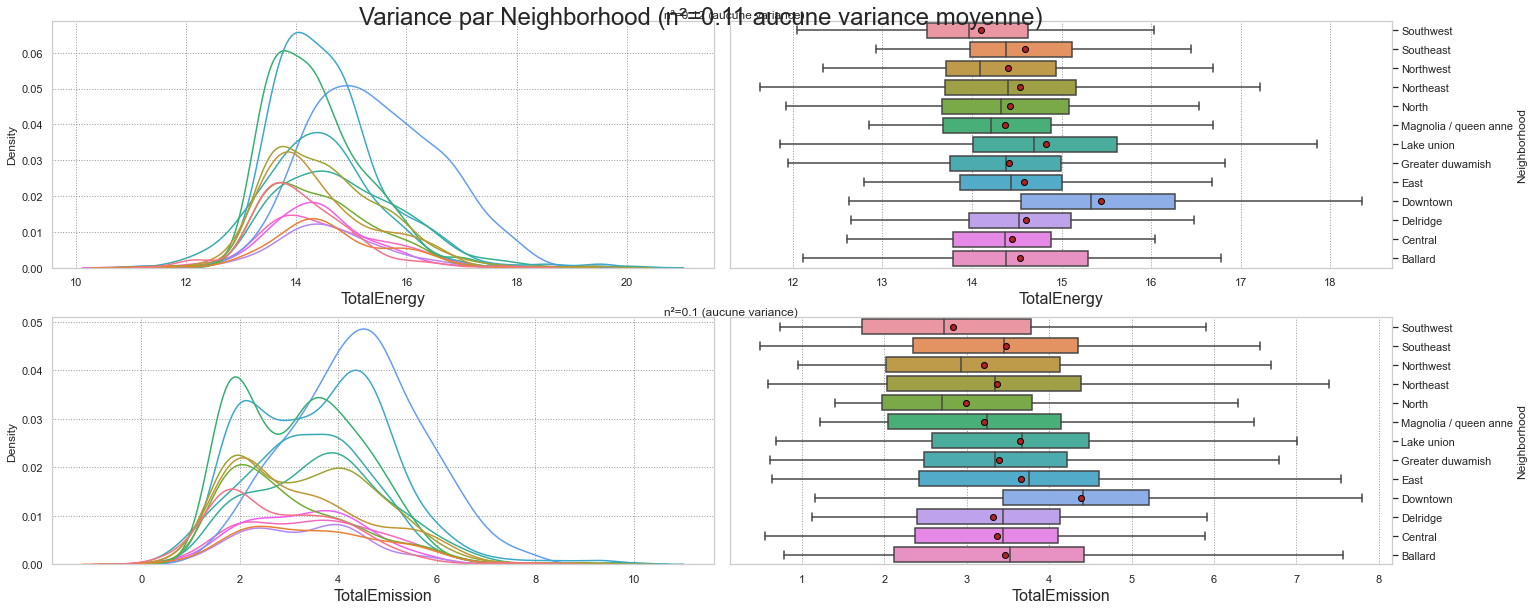

In [58]:
X = 'Neighborhood'
ANOVA(df, X, ['TotalEnergy', 'TotalEmission'])

## 3.5- A.C.P

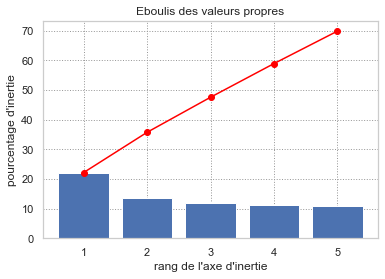

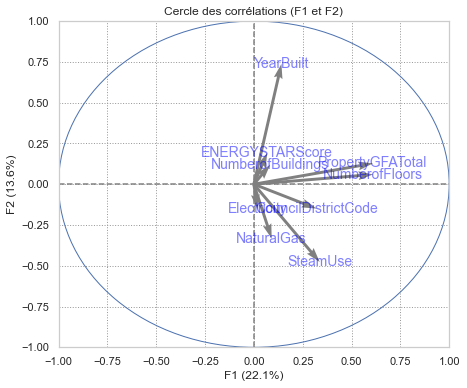

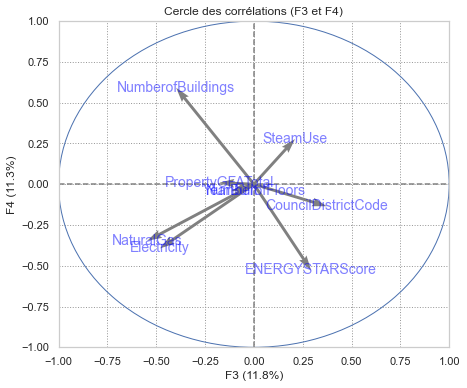

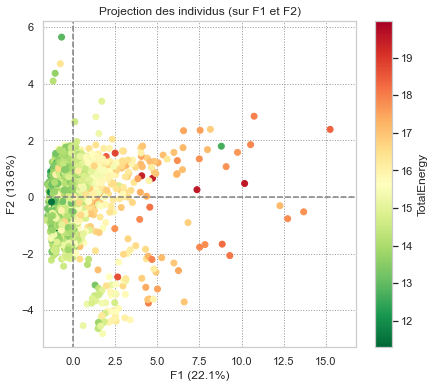

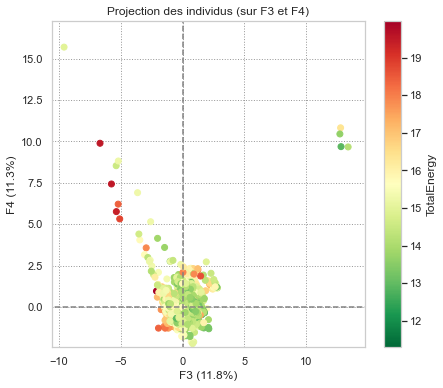

In [59]:
pcs = PCA(df[colsOfType(df[Attributs])], 5, continuous_illustrative_var=df['TotalEnergy'])

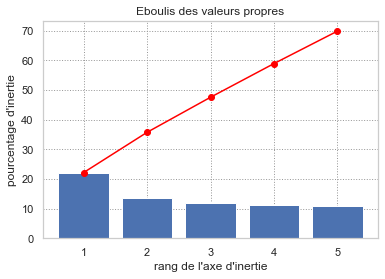

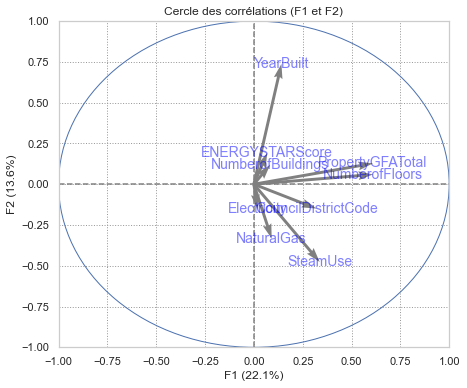

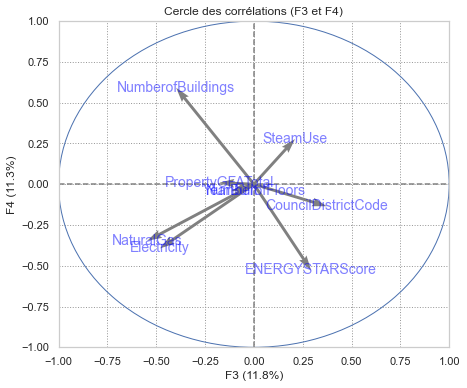

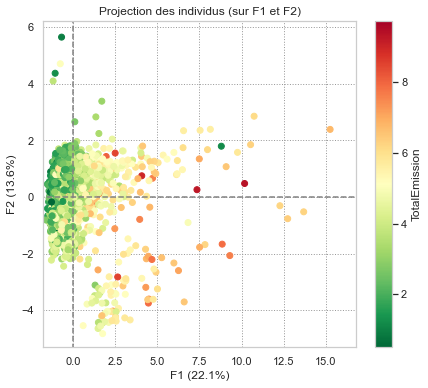

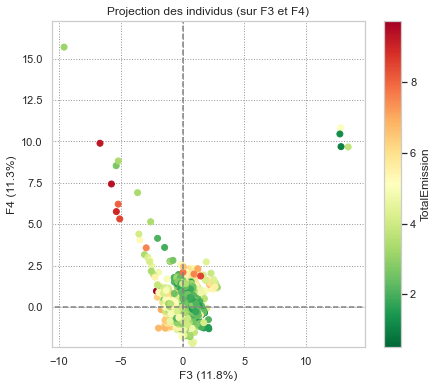

In [60]:
pcs = PCA(df[colsOfType(df[Attributs])], 5, continuous_illustrative_var=df['TotalEmission'])

In [61]:
df = df.reset_index(drop=True)
df.to_csv('building-energy-benchmarking.csv')

# 4- Modèles de TotalEnergy

## 4.1- Sans Catégories

### 4.1.1- Construction des Sets

In [62]:
# Sélection des attributs
XCols = colsOfType(df)
XCols.remove('OSEBuildingID')
XCols.remove('CouncilDistrictCode')
XCols.remove('TotalEmission')

y = 'TotalEnergy'
X = df[XCols].sort_values(by=[y])

print('Attributs:', ','.join(X.columns.tolist()))

# Construction des sets
X_train, X_test, y_train, y_test = trainning_sets(X, y, random_state=0, scale='robust')

# Vérfication de l'intersection vide
np.array([x for x in set(tuple(x) for x in X_train) & set(tuple(x) for x in X_test)])

# Sélection des scores pour l'évaluation des modèles
score_cv = 'neg_mean_squared_log_error'
scores = ['RMSLE', 'R²']
Perfs = pd.DataFrame(columns=['Model']+scores, index=[])
hue = 'None'

Attributs: PropertyGFATotal,SteamUse,Electricity,NaturalGas,ENERGYSTARScore,YearBuilt,NumberofBuildings,NumberofFloors,TotalEnergy


### 4.1.2- Baseline

modèle de référence

In [63]:
def baseline(Perfs):
    dum = dummy.DummyRegressor(strategy='mean')
    Perfs, model = train(X_train, y_train, X_test, y_test, 'Dummy', dum, Perfs, scores, hue=hue)
    return Perfs

-------------------- Dummy --------------------
Model       Dummy
RMSLE    0.070885
R²       0.004968
Time     0.000567
hue          None
Name: 0, dtype: object


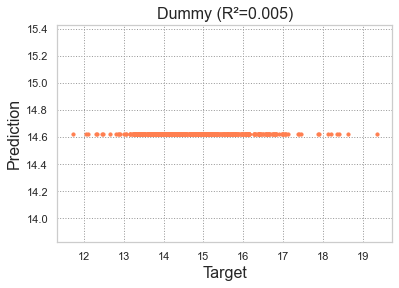

In [64]:
Perfs = baseline(Perfs)

### 4.1.3- Modèles Linéaires

In [65]:
def linearModels(Perfs):
    # Régression Linéaire
    LR = LinearRegression(n_jobs=-1)
    Perfs, model = train(X_train, y_train, X_test, y_test, 'LinearRegression', LR, Perfs, scores, hue=hue)

    # Elastic Net
    EN = ElasticNetCV(n_jobs=-1)
    Perfs, model = train(X_train, y_train, X_test, y_test, 'ElasticNet', EN, Perfs, scores, hue=hue)

    # SVR Linéaire
    LSVR = LinearSVR()
    Perfs, model = train(X_train, y_train, X_test, y_test, 'LinearSVR', LSVR, Perfs, scores, hue=hue)

    return Perfs

-------------------- LinearRegression --------------------
Model    LinearRegression
RMSLE            0.043348
R²               0.619477
Time             0.003828
hue                  None
Name: 1, dtype: object


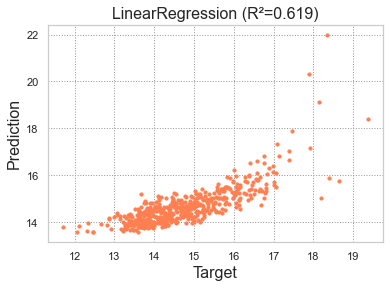

-------------------- ElasticNet --------------------
Model    ElasticNet
RMSLE      0.043471
R²         0.616841
Time       0.149166
hue            None
Name: 2, dtype: object


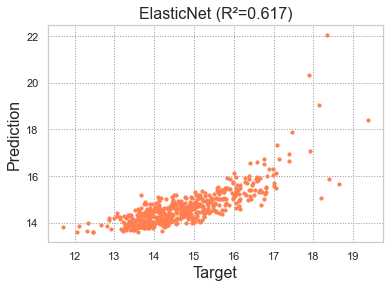

-------------------- LinearSVR --------------------
Model    LinearSVR
RMSLE     0.043197
R²        0.552468
Time      0.075046
hue           None
Name: 3, dtype: object


C:\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


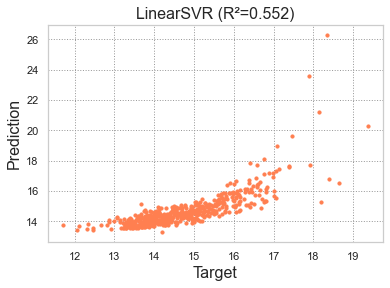

In [66]:
Perfs = linearModels(Perfs)

### 4.1.4- Modèles Non Linéaires

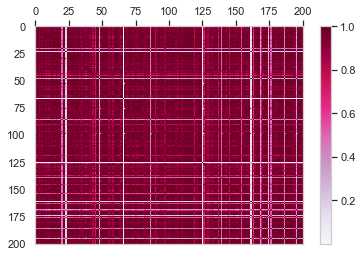

In [67]:
# Gram/K Matrix
kmatrix = metrics.pairwise.rbf_kernel(X_train, gamma=0.01)
kmatrix = kmatrix[:200, :200]

# dessiner la matrice
plt.pcolor(kmatrix, cmap=cm.PuRd) 
# rajouter la légende
plt.colorbar()
# retourner l'axe des ordonnées
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()

# afficher l'image
plt.show()

In [68]:
def nonLinearModel(Perfs):
    # KNN Regressor (CV)
    param_grid = {'n_neighbors':np.arange(3, 50)}
    Perfs, model = train_cv(X_train, y_train, X_test, y_test, 'KNN (CV)', KNeighborsRegressor(), Perfs, param_grid, scores=scores, hue=hue)

    # KRR (CV)
    param_grid = {'kernel':['rbf', 'sigmoid'], 'alpha': np.logspace(-3, 0, 5), 'gamma': np.logspace(-4, 0, 4)}
    Perfs, model = train_cv(X_train, y_train, X_test, y_test, 'KernelRidge (CV)', KernelRidge(), Perfs, param_grid, scores=scores, hue=hue)

    # SVR (CV)
    param_grid = {'kernel':['rbf', 'sigmoid'], 'C': np.logspace(-3, 2, 10), 'gamma': np.logspace(-4, 0, 10), 'epsilon': np.logspace(-3, 2, 10)}
    Perfs, model = train_cv(X_train, y_train, X_test, y_test, 'SVR (CV)', SVR(), Perfs, param_grid, scores=scores, hue=hue)

    # MLPR (CV)
    param_grid = {'max_iter': np.arange(1000, 3000, 1000), 'alpha': np.logspace(-7, 0, 7), 'random_state':np.arange(10), 'hidden_layer_sizes':[(20, 15, 10, 5,),(15, 10, 5,)]}
    Perfs, model = train_cv(X_train, y_train, X_test, y_test, 'MLPR (CV)', MLPRegressor(), Perfs, param_grid, scores=scores, hue=hue)

    return Perfs

-------------------- KNN (CV) --------------------
Model    KNN (CV)
RMSLE    0.035495
R²       0.749511
Time     0.223109
hue          None
Name: 4, dtype: object


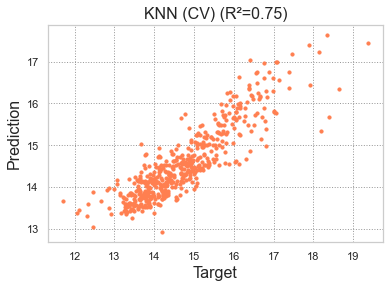

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 19}
-------------------- KernelRidge (CV) --------------------


C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [        nan -0.00141642 -0.01894952 -0.00155542 -0.00151752 -0.00393141
 -0.25316172 -0.01885871         nan         nan]
  warnings.warn(


Model    KernelRidge (CV)
RMSLE            0.031449
R²                0.80676
Time            21.568047
hue                  None
Name: 5, dtype: object


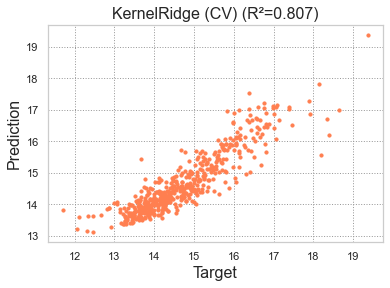

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'kernel': 'rbf', 'gamma': 0.002154434690031882, 'alpha': 0.001}
-------------------- SVR (CV) --------------------


C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.0129891  -0.00844158 -0.00411997 -0.00844158 -0.00110933 -0.00844158
         nan -0.00359987 -0.00844158 -0.00844158]
  warnings.warn(


Model    SVR (CV)
RMSLE    0.031804
R²       0.801206
Time     1.168171
hue          None
Name: 6, dtype: object


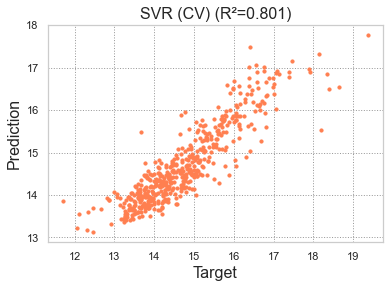

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'kernel': 'rbf', 'gamma': 0.046415888336127774, 'epsilon': 0.5994842503189409, 'C': 2.1544346900318843}
-------------------- MLPR (CV) --------------------
Model    MLPR (CV)
RMSLE     0.032203
R²        0.795847
Time     33.654166
hue           None
Name: 7, dtype: object


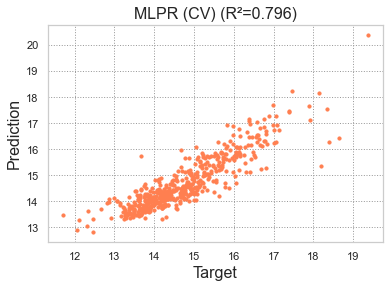

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'random_state': 8, 'max_iter': 1000, 'hidden_layer_sizes': (20, 15, 10, 5), 'alpha': 1.4677992676220705e-06}


In [69]:
Perfs = nonLinearModel(Perfs)

### 4.1.5- Méthodes Ensemblistes

#### 4.1.5.1- Foret Aléatoire (CV)

-------------------- RandomForest (CV) --------------------
Model    RandomForest (CV)
RMSLE             0.032685
R²                0.793956
Time              36.90432
hue                   None
Name: 8, dtype: object


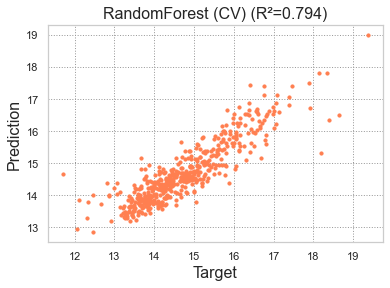

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'random_state': 0, 'n_estimators': 700}


In [70]:
param_grid = {'random_state':np.arange(5), 'n_estimators': np.arange(100, 1000, 200)}
rfr = RandomForestRegressor(oob_score=True, n_jobs =-1)
Perfs, rfr = train_cv(X_train, y_train, X_test, y_test, 'RandomForest (CV)', rfr, Perfs, param_grid, scores=scores, hue=hue)

#### 4.1.5.2- Importance des Attributs/Features

-------------------- Feature importances --------------------


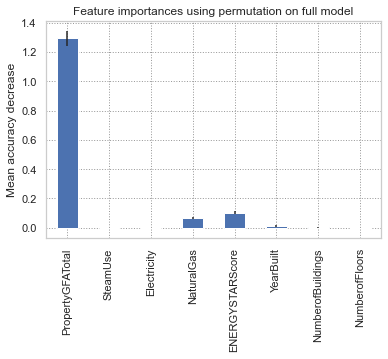

In [71]:
features_importances(X, y, X_test, y_test, rfr)

#### 4.1.5.3- Gradient Boosting

-------------------- GradientBoostingRegressor (CV) --------------------


C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.00420144 -0.00097984 -0.00245834 -0.00104388 -0.00108006 -0.00195812
 -0.00403055 -0.00310181         nan -0.00427475]
  warnings.warn(


Model    GradientBoostingRegressor (CV)
RMSLE                          0.032665
R²                              0.79253
Time                           6.731903
hue                                None
Name: 9, dtype: object


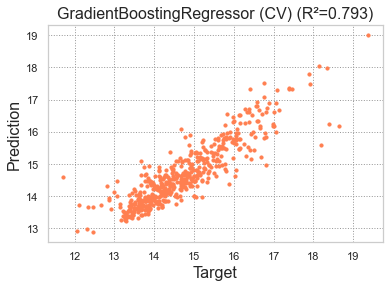

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'random_state': 2, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.1}


In [72]:
param_grid = {'random_state':np.arange(5), 'n_estimators': np.arange(100, 1000, 200), 'learning_rate': np.logspace(-4, -1, 4), 'max_depth':np.arange(5)}
gbr = GradientBoostingRegressor()
Perfs, gbr = train_cv(X_train, y_train, X_test, y_test, 'GradientBoostingRegressor (CV)', gbr, Perfs, param_grid, scores=scores, hue=hue)

In [73]:
def ensembles(Perfs):
    # Random Forest (CV)
    param_grid = {'random_state':np.arange(5), 'n_estimators': np.arange(100, 1000, 200)}
    rfr = RandomForestRegressor(oob_score=True, n_jobs =-1)
    Perfs, rfr = train_cv(X_train, y_train, X_test, y_test, 'RandomForest (CV)', rfr, Perfs, param_grid, scores=scores, hue=hue)

    features_importances(X, y, X_test, y_test, rfr)

    # GradientBoostingRegressor (CV)
    param_grid = {'random_state':np.arange(5), 'n_estimators': np.arange(100, 1000, 200), 'learning_rate': np.logspace(-4, -1, 4), 'max_depth':np.arange(5)}
    gbr = GradientBoostingRegressor()
    Perfs, gbr = train_cv(X_train, y_train, X_test, y_test, 'GradientBoostingRegressor (CV)', gbr, Perfs, param_grid, scores=scores, hue=hue)

    return Perfs

## 4.2 Avec Catégories en Label Encoding (LE)

In [74]:
# Sélection des attributs
XCols = colsOfType(df_LE)
XCols.remove('OSEBuildingID')
XCols.remove('CouncilDistrictCode')
XCols.remove('TotalEmission')

y = 'TotalEnergy'
X = df_LE[XCols].sort_values(by=[y])

print('Attributs:', ','.join(X.columns.tolist()))

# Construction des sets
X_train, X_test, y_train, y_test = trainning_sets(X, y, random_state=None, scale='robust')

# Vérfication de l'intersection vide
np.array([x for x in set(tuple(x) for x in X_train) & set(tuple(x) for x in X_test)])
hue='LE'

Attributs: BuildingType,PropertyGFATotal,LargestPropertyUseType,SteamUse,Electricity,NaturalGas,ENERGYSTARScore,YearBuilt,NumberofBuildings,NumberofFloors,TotalEnergy


-------------------- Dummy --------------------
Model       Dummy
RMSLE    0.065285
R²       0.000051
Time     0.000452
hue            LE
Name: 10, dtype: object


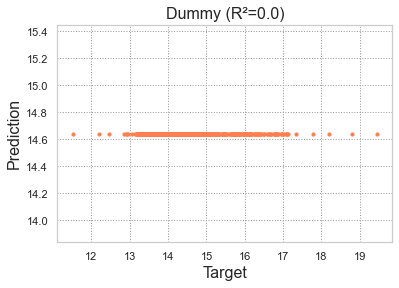

-------------------- LinearRegression --------------------
Model    LinearRegression
RMSLE            0.039948
R²                0.62983
Time              0.00303
hue                    LE
Name: 11, dtype: object


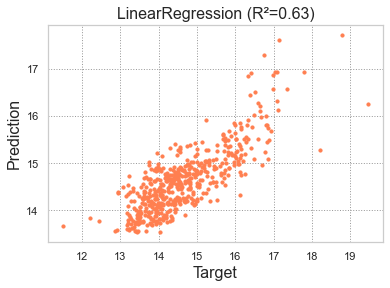

-------------------- ElasticNet --------------------
Model    ElasticNet
RMSLE      0.039904
R²         0.630636
Time        0.13923
hue              LE
Name: 12, dtype: object


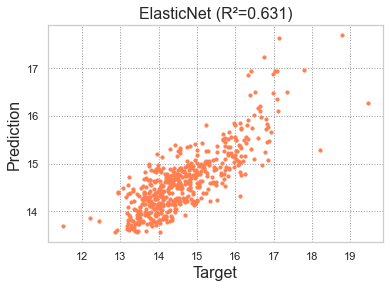

-------------------- LinearSVR --------------------
Model    LinearSVR
RMSLE     0.036162
R²        0.691073
Time      0.048374
hue             LE
Name: 13, dtype: object


C:\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


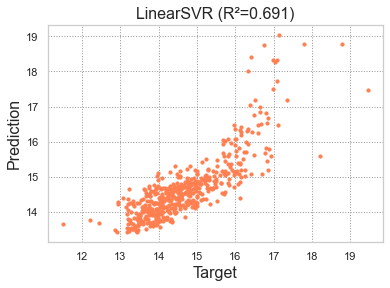

-------------------- KNN (CV) --------------------
Model    KNN (CV)
RMSLE    0.029154
R²       0.801542
Time     0.241384
hue            LE
Name: 14, dtype: object


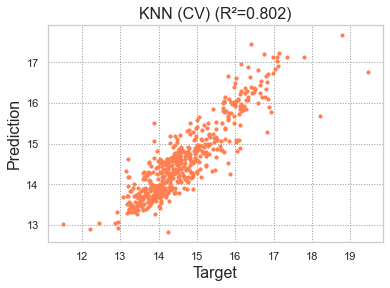

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 7}
-------------------- KernelRidge (CV) --------------------


C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.00125759 -0.39504984 -0.41904243 -0.01296248         nan         nan
 -0.50586905 -0.01733285 -0.00194373 -0.00107216]
  warnings.warn(


Model    KernelRidge (CV)
RMSLE            0.029671
R²                0.79743
Time            12.661577
hue                    LE
Name: 15, dtype: object


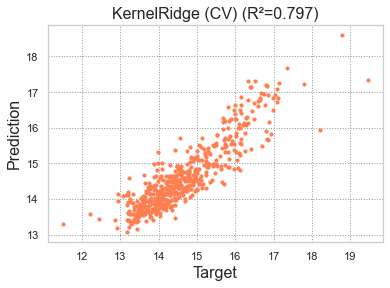

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'kernel': 'rbf', 'gamma': 0.002154434690031882, 'alpha': 0.03162277660168379}
-------------------- SVR (CV) --------------------


C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.00090196 -0.00849715 -0.00560597 -0.00849715 -0.03215873         nan
         nan -0.00225155 -0.00475225 -0.00849715]
  warnings.warn(


Model    SVR (CV)
RMSLE    0.026799
R²       0.832476
Time      2.01248
hue            LE
Name: 16, dtype: object


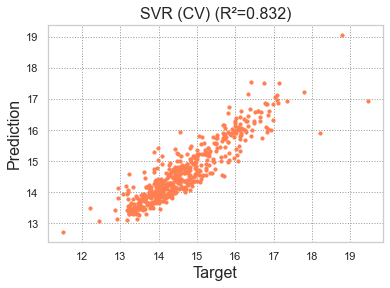

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'kernel': 'rbf', 'gamma': 0.016681005372000592, 'epsilon': 0.046415888336127795, 'C': 7.742636826811277}
-------------------- MLPR (CV) --------------------
Model    MLPR (CV)
RMSLE     0.027058
R²        0.829298
Time     45.255622
hue             LE
Name: 17, dtype: object


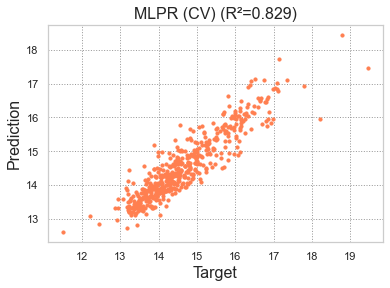

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'random_state': 1, 'max_iter': 2000, 'hidden_layer_sizes': (20, 15, 10, 5), 'alpha': 1.0}
-------------------- RandomForest (CV) --------------------
Model    RandomForest (CV)
RMSLE              0.02485
R²                0.855335
Time             28.368337
hue                     LE
Name: 18, dtype: object


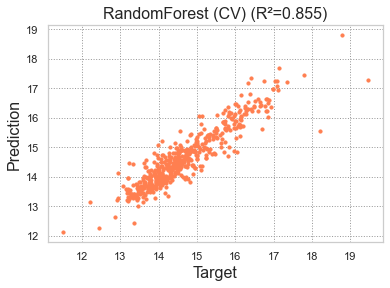

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'random_state': 1, 'n_estimators': 300}
-------------------- Feature importances --------------------


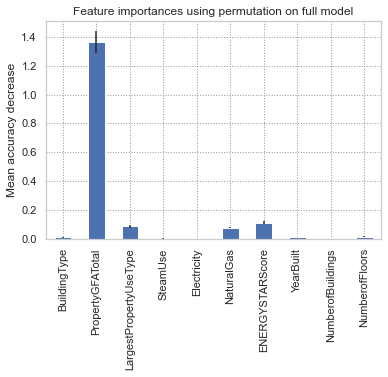

-------------------- GradientBoostingRegressor (CV) --------------------


C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.00183394 -0.00071973         nan -0.00061708 -0.00157369         nan
         nan -0.00108366 -0.00200115 -0.00075089]
  warnings.warn(


Model    GradientBoostingRegressor (CV)
RMSLE                          0.022218
R²                             0.884957
Time                           9.500864
hue                                  LE
Name: 19, dtype: object


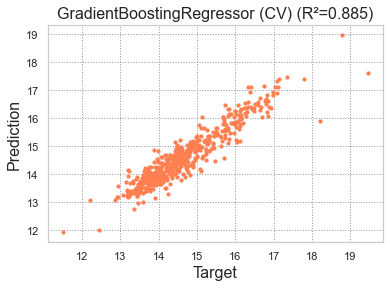

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'random_state': 4, 'n_estimators': 900, 'max_depth': 4, 'learning_rate': 0.01}


In [75]:
Perfs = baseline(Perfs)
Perfs = linearModels(Perfs)
Perfs = nonLinearModel(Perfs)
Perfs = ensembles(Perfs)

## 4.3 Avec Catégories en One Hot Encoding (OHE)

In [76]:
# Sélection des attributs
XCols = colsOfType(df_OHE)
XCols.remove('OSEBuildingID')
XCols.remove('CouncilDistrictCode')
XCols.remove('TotalEmission')

y = 'TotalEnergy'
X = df_OHE[XCols].sort_values(by=[y])

print('Attributs:', ','.join(X.columns.tolist()))

# Construction des sets
X_train, X_test, y_train, y_test = trainning_sets(X, y, random_state=0, scale='robust')

# Vérfication de l'intersection vide
np.array([x for x in set(tuple(x) for x in X_train) & set(tuple(x) for x in X_test)])
hue='OHE'

Attributs: PropertyGFATotal,SteamUse,Electricity,NaturalGas,ENERGYSTARScore,YearBuilt,NumberofBuildings,NumberofFloors,TotalEnergy


-------------------- Dummy --------------------
Model       Dummy
RMSLE    0.070885
R²       0.004968
Time     0.000532
hue           OHE
Name: 20, dtype: object


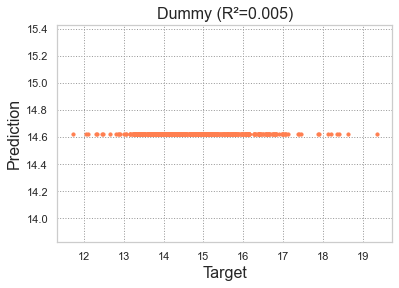

-------------------- LinearRegression --------------------
Model    LinearRegression
RMSLE            0.043348
R²               0.619477
Time             0.002844
hue                   OHE
Name: 21, dtype: object


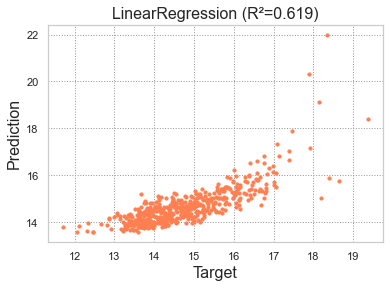

-------------------- ElasticNet --------------------
Model    ElasticNet
RMSLE      0.043471
R²         0.616841
Time       0.290361
hue             OHE
Name: 22, dtype: object


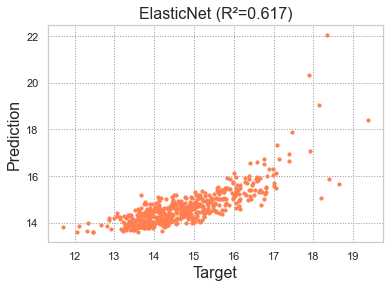

-------------------- LinearSVR --------------------
Model    LinearSVR
RMSLE     0.043231
R²        0.551484
Time      0.077853
hue            OHE
Name: 23, dtype: object


C:\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


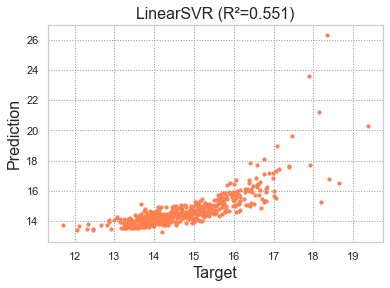

-------------------- KNN (CV) --------------------
Model    KNN (CV)
RMSLE    0.035136
R²       0.755536
Time     0.186588
hue           OHE
Name: 24, dtype: object


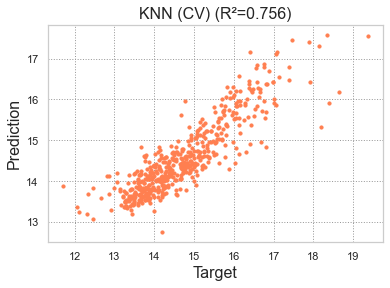

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 12}
-------------------- KernelRidge (CV) --------------------


C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.00141642 -0.25316172         nan         nan -0.00237182 -0.00275805
 -0.00134247 -0.00393141         nan -0.01894952]
  warnings.warn(


Model    KernelRidge (CV)
RMSLE            0.035741
R²               0.750662
Time             26.77783
hue                   OHE
Name: 25, dtype: object


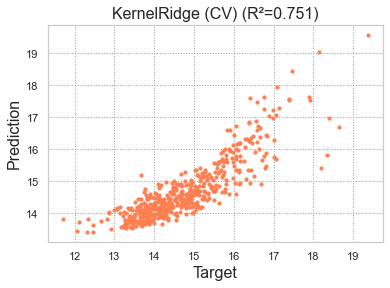

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'kernel': 'rbf', 'gamma': 0.0001, 'alpha': 0.001}
-------------------- SVR (CV) --------------------


C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.00844158         nan -0.00408216 -0.00386398 -0.00307783 -0.00104898
 -0.00161817 -0.00289856 -0.00178952 -0.00111801]
  warnings.warn(


Model    SVR (CV)
RMSLE    0.031676
R²       0.805297
Time     2.335955
hue           OHE
Name: 26, dtype: object


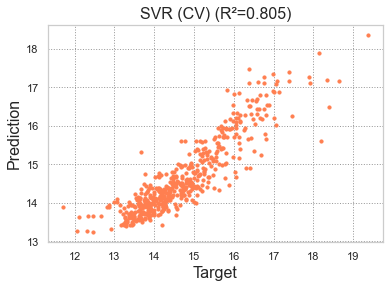

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'kernel': 'rbf', 'gamma': 0.005994842503189409, 'epsilon': 0.1668100537200059, 'C': 7.742636826811277}
-------------------- MLPR (CV) --------------------
Model    MLPR (CV)
RMSLE     0.031342
R²        0.810481
Time     39.424061
hue            OHE
Name: 27, dtype: object


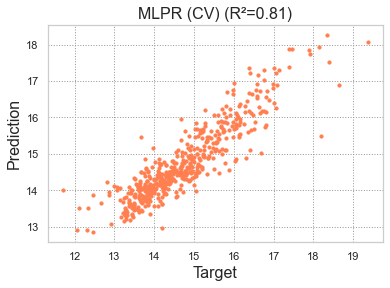

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'random_state': 3, 'max_iter': 1000, 'hidden_layer_sizes': (15, 10, 5), 'alpha': 0.004641588833612782}
-------------------- RandomForest (CV) --------------------
Model    RandomForest (CV)
RMSLE             0.032741
R²                0.793147
Time             27.799639
hue                    OHE
Name: 28, dtype: object


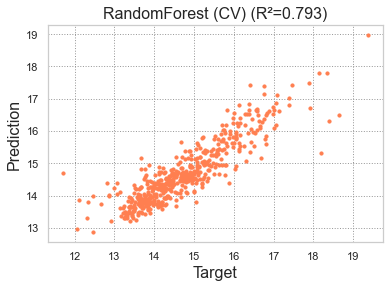

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'random_state': 0, 'n_estimators': 500}
-------------------- Feature importances --------------------


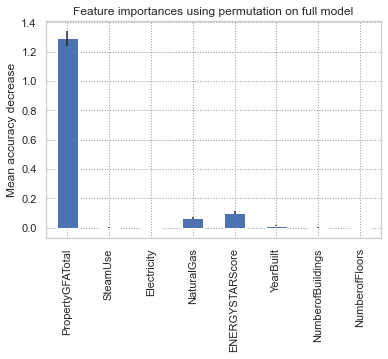

-------------------- GradientBoostingRegressor (CV) --------------------


C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.00425011         nan         nan -0.00245834 -0.00191312 -0.00269516
 -0.00098906 -0.00098906 -0.00310181 -0.0039905 ]
  warnings.warn(


Model    GradientBoostingRegressor (CV)
RMSLE                          0.030457
R²                              0.82189
Time                           8.072624
hue                                 OHE
Name: 29, dtype: object


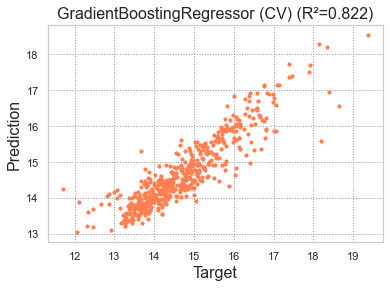

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'random_state': 2, 'n_estimators': 700, 'max_depth': 1, 'learning_rate': 0.1}


In [77]:
Perfs = baseline(Perfs)
Perfs = linearModels(Perfs)
Perfs = nonLinearModel(Perfs)
Perfs = ensembles(Perfs)

## 4.4- Evaluation des Modèles

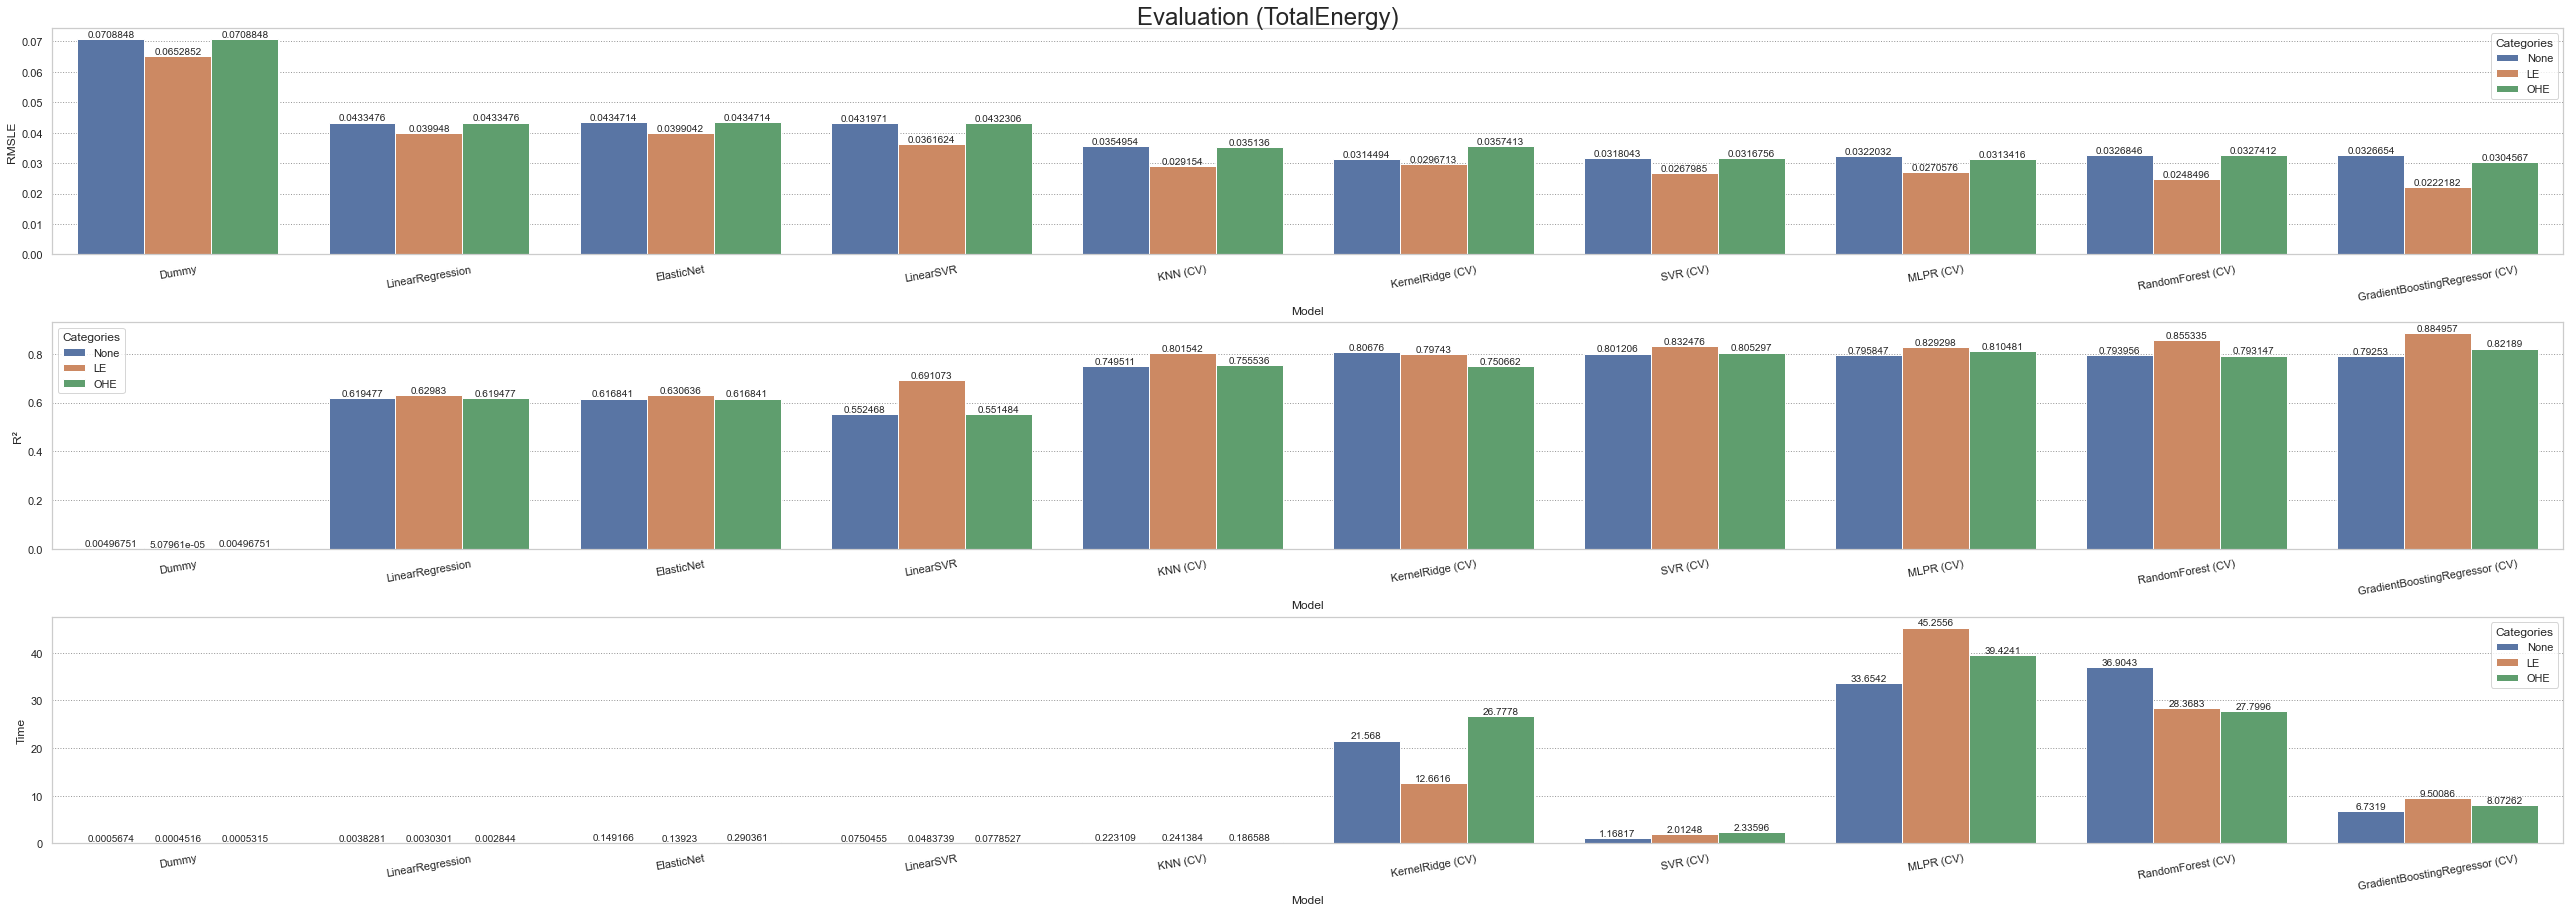

In [78]:
display_scores(Perfs, y, hue='Categories')

# 5- Modèles de TotalEmission

## 5.1- Sans Catégories

In [79]:
# Sélection des attributs
XCols = colsOfType(df)
XCols.remove('OSEBuildingID')
XCols.remove('CouncilDistrictCode')
XCols.remove('TotalEnergy')

y = 'TotalEmission'
X = df[XCols].sort_values(by=[y])

print('Attributs:', ','.join(X.columns.tolist()))

# Construction des sets
X_train, X_test, y_train, y_test = trainning_sets(X, y, random_state=0, scale='robust')

# Vérfication de l'intersection vide
np.array([x for x in set(tuple(x) for x in X_train) & set(tuple(x) for x in X_test)])

# Sélection des scores pour l'évaluation des modèles
score_cv = 'neg_mean_squared_log_error'
scores = ['RMSLE', 'R²']
Perfs = pd.DataFrame(columns=['Model']+scores, index=[])
hue='None'

Attributs: PropertyGFATotal,SteamUse,Electricity,NaturalGas,ENERGYSTARScore,YearBuilt,NumberofBuildings,NumberofFloors,TotalEmission


-------------------- Dummy --------------------
Model       Dummy
RMSLE    0.322964
R²       0.004592
Time     0.000782
hue          None
Name: 0, dtype: object


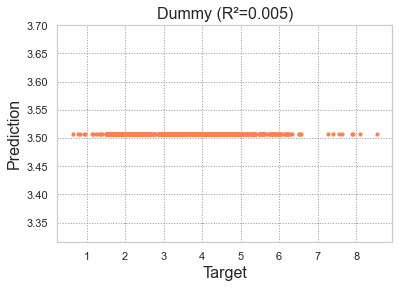

-------------------- LinearRegression --------------------
Model    LinearRegression
RMSLE             0.18068
R²               0.647306
Time             0.003013
hue                  None
Name: 1, dtype: object


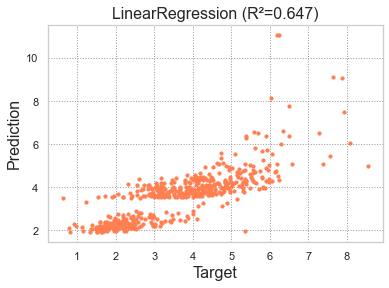

-------------------- ElasticNet --------------------
Model    ElasticNet
RMSLE      0.179362
R²         0.651653
Time       0.142353
hue            None
Name: 2, dtype: object


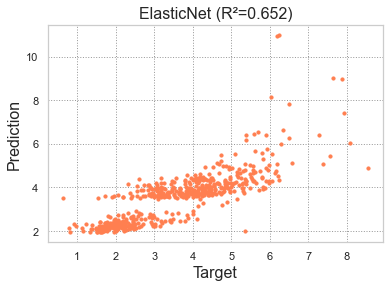

-------------------- LinearSVR --------------------
Model    LinearSVR
RMSLE     0.175363
R²        0.579266
Time       0.06311
hue           None
Name: 3, dtype: object


C:\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


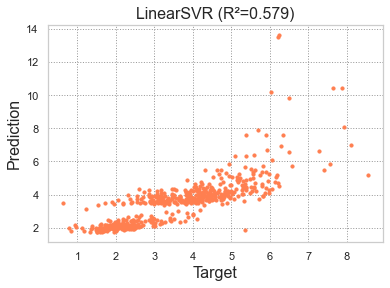

-------------------- KNN (CV) --------------------
Model    KNN (CV)
RMSLE    0.155051
R²       0.741684
Time     0.209385
hue          None
Name: 4, dtype: object


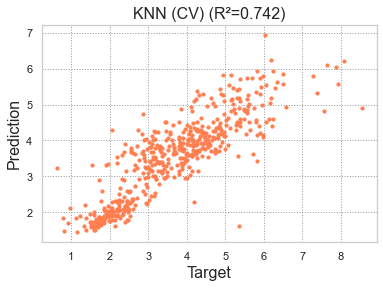

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 10}
-------------------- KernelRidge (CV) --------------------


C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.03150829 -0.02105728         nan         nan         nan         nan
         nan -0.08719912         nan         nan]
  warnings.warn(


Model    KernelRidge (CV)
RMSLE            0.150508
R²               0.780206
Time            30.684146
hue                  None
Name: 5, dtype: object


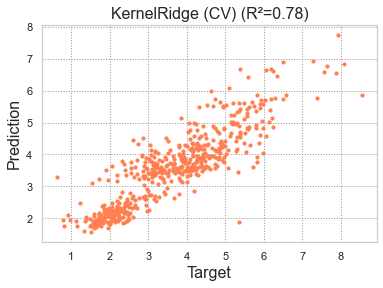

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'kernel': 'rbf', 'gamma': 0.002154434690031882, 'alpha': 0.03162277660168379}
-------------------- SVR (CV) --------------------
Model    SVR (CV)
RMSLE    0.148138
R²         0.7711
Time     2.830357
hue          None
Name: 6, dtype: object


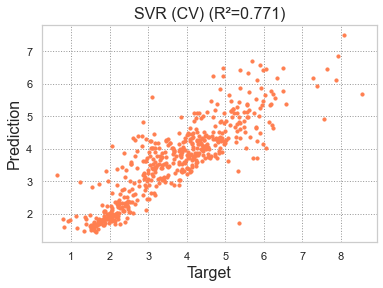

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'kernel': 'rbf', 'gamma': 0.12915496650148828, 'epsilon': 0.1668100537200059, 'C': 7.742636826811277}
-------------------- MLPR (CV) --------------------
Model    MLPR (CV)
RMSLE     0.144722
R²        0.786347
Time     27.634718
hue           None
Name: 7, dtype: object


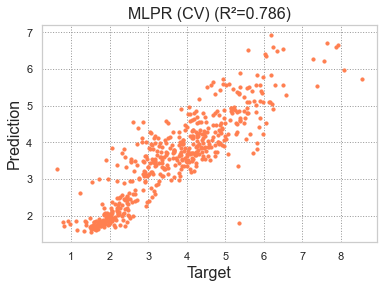

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'random_state': 2, 'max_iter': 1000, 'hidden_layer_sizes': (15, 10, 5), 'alpha': 1.0}
-------------------- RandomForest (CV) --------------------
Model    RandomForest (CV)
RMSLE             0.148034
R²                0.775539
Time              31.60933
hue                   None
Name: 8, dtype: object


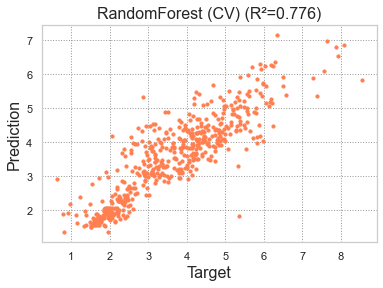

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'random_state': 3, 'n_estimators': 500}
-------------------- Feature importances --------------------


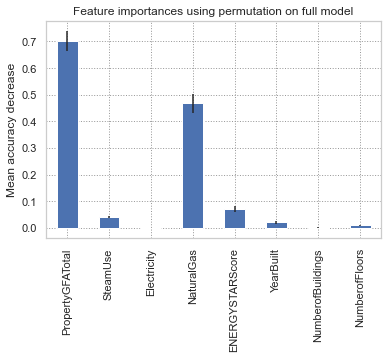

-------------------- GradientBoostingRegressor (CV) --------------------


C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.0606706  -0.02290745 -0.0899938  -0.01938567 -0.04182464 -0.02342583
         nan -0.08997627 -0.09885166 -0.02107157]
  warnings.warn(


Model    GradientBoostingRegressor (CV)
RMSLE                          0.143063
R²                             0.793659
Time                           7.752427
hue                                None
Name: 9, dtype: object


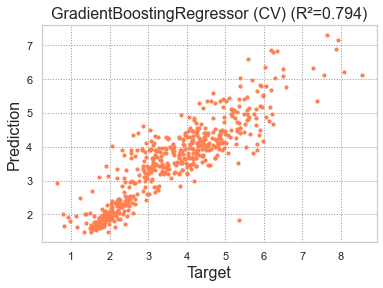

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'random_state': 3, 'n_estimators': 900, 'max_depth': 2, 'learning_rate': 0.01}


In [80]:
Perfs = baseline(Perfs)
Perfs = linearModels(Perfs)
Perfs = nonLinearModel(Perfs)
Perfs = ensembles(Perfs)

## 5.2 Avec Catégories en Label Encoding (LE)

In [81]:
# Sélection des attributs
XCols = colsOfType(df_LE)
XCols.remove('OSEBuildingID')
XCols.remove('CouncilDistrictCode')
XCols.remove('TotalEmission')

y = 'TotalEnergy'
X = df_LE[XCols].sort_values(by=[y])

print('Attributs:', ','.join(X.columns.tolist()))

# Construction des sets
X_train, X_test, y_train, y_test = trainning_sets(X, y, random_state=0, scale='robust')

# Vérfication de l'intersection vide
np.array([x for x in set(tuple(x) for x in X_train) & set(tuple(x) for x in X_test)])
hue='LE'

Attributs: BuildingType,PropertyGFATotal,LargestPropertyUseType,SteamUse,Electricity,NaturalGas,ENERGYSTARScore,YearBuilt,NumberofBuildings,NumberofFloors,TotalEnergy


-------------------- Dummy --------------------
Model       Dummy
RMSLE    0.070885
R²       0.004968
Time     0.000609
hue            LE
Name: 10, dtype: object


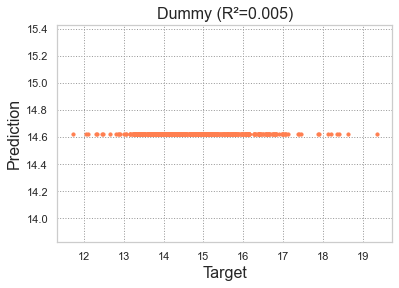

-------------------- LinearRegression --------------------
Model    LinearRegression
RMSLE            0.042589
R²               0.633436
Time             0.003059
hue                    LE
Name: 11, dtype: object


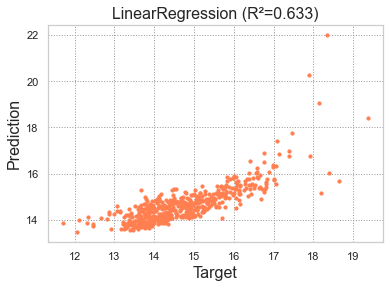

-------------------- ElasticNet --------------------
Model    ElasticNet
RMSLE      0.042715
R²         0.630732
Time       0.139025
hue              LE
Name: 12, dtype: object


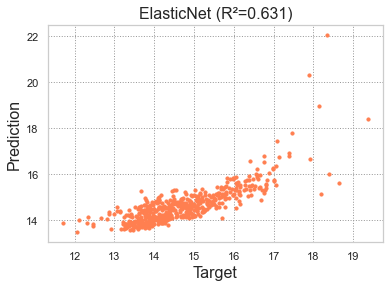

-------------------- LinearSVR --------------------
Model    LinearSVR
RMSLE     0.042308
R²        0.574814
Time      0.080294
hue             LE
Name: 13, dtype: object


C:\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


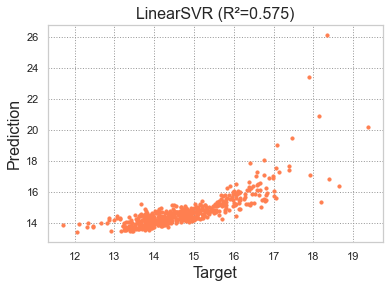

-------------------- KNN (CV) --------------------
Model    KNN (CV)
RMSLE    0.031902
R²       0.799426
Time     0.209528
hue            LE
Name: 14, dtype: object


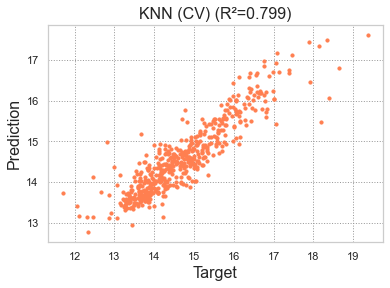

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 8}
-------------------- KernelRidge (CV) --------------------


C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.00154023         nan -0.4580996  -0.4538198  -0.45303244 -0.00149614
         nan         nan         nan         nan]
  warnings.warn(


Model    KernelRidge (CV)
RMSLE            0.031134
R²               0.815833
Time            26.300161
hue                    LE
Name: 15, dtype: object


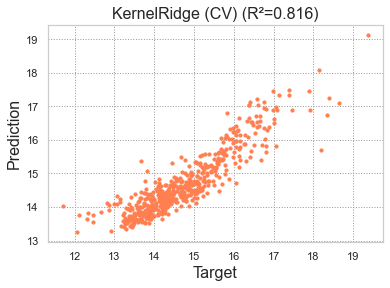

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'kernel': 'rbf', 'gamma': 0.002154434690031882, 'alpha': 0.03162277660168379}
-------------------- SVR (CV) --------------------


C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.00844158 -0.00844158 -0.00460712 -0.00285307 -0.00093532 -0.00844158
 -0.00255682         nan         nan -0.00460963]
  warnings.warn(


Model    SVR (CV)
RMSLE    0.031162
R²       0.802903
Time     1.385208
hue            LE
Name: 16, dtype: object


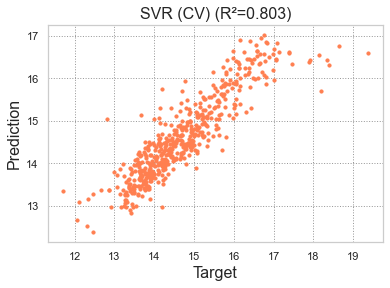

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'kernel': 'rbf', 'gamma': 0.12915496650148828, 'epsilon': 0.5994842503189409, 'C': 27.825594022071257}
-------------------- MLPR (CV) --------------------
Model    MLPR (CV)
RMSLE     0.027722
R²        0.853011
Time     51.218845
hue             LE
Name: 17, dtype: object


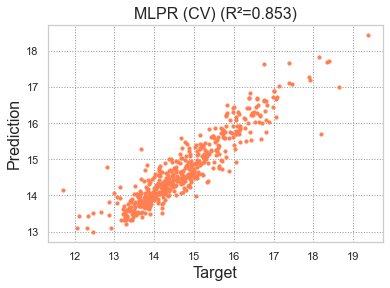

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'random_state': 4, 'max_iter': 2000, 'hidden_layer_sizes': (20, 15, 10, 5), 'alpha': 1.0}
-------------------- RandomForest (CV) --------------------
Model    RandomForest (CV)
RMSLE             0.028443
R²                0.846247
Time             35.276332
hue                     LE
Name: 18, dtype: object


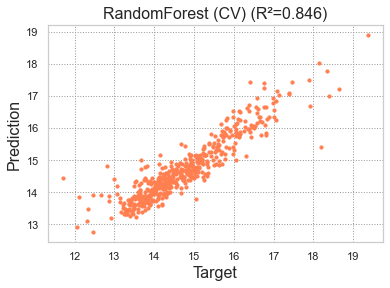

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'random_state': 0, 'n_estimators': 900}
-------------------- Feature importances --------------------


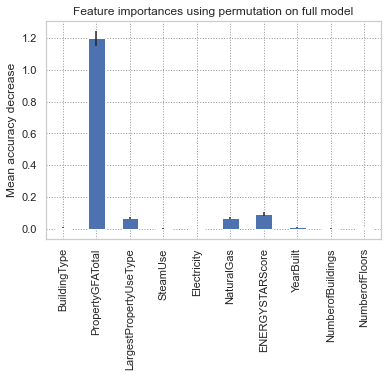

-------------------- GradientBoostingRegressor (CV) --------------------


C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [        nan         nan -0.00202681 -0.00449152 -0.00061574 -0.00060333
         nan -0.00071267         nan -0.0035752 ]
  warnings.warn(


Model    GradientBoostingRegressor (CV)
RMSLE                          0.026317
R²                             0.866408
Time                           7.911556
hue                                  LE
Name: 19, dtype: object


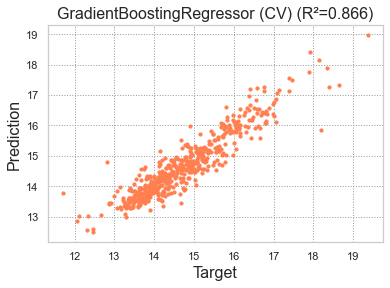

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'random_state': 0, 'n_estimators': 900, 'max_depth': 3, 'learning_rate': 0.1}


In [82]:
Perfs = baseline(Perfs)
Perfs = linearModels(Perfs)
Perfs = nonLinearModel(Perfs)
Perfs = ensembles(Perfs)

## 5.3 Avec Catégories en One Hot Encoding (OHE)

In [83]:
# Sélection des attributs
XCols = colsOfType(df_OHE)
XCols.remove('OSEBuildingID')
XCols.remove('CouncilDistrictCode')
XCols.remove('TotalEmission')

y = 'TotalEnergy'
X = df_OHE[XCols].sort_values(by=[y])

print('Attributs:', ','.join(X.columns.tolist()))

# Construction des sets
X_train, X_test, y_train, y_test = trainning_sets(X, y, random_state=0, scale='robust')

# Vérfication de l'intersection vide
np.array([x for x in set(tuple(x) for x in X_train) & set(tuple(x) for x in X_test)])
hue='OHE'

Attributs: PropertyGFATotal,SteamUse,Electricity,NaturalGas,ENERGYSTARScore,YearBuilt,NumberofBuildings,NumberofFloors,TotalEnergy


-------------------- Dummy --------------------
Model       Dummy
RMSLE    0.070885
R²       0.004968
Time      0.00073
hue           OHE
Name: 20, dtype: object


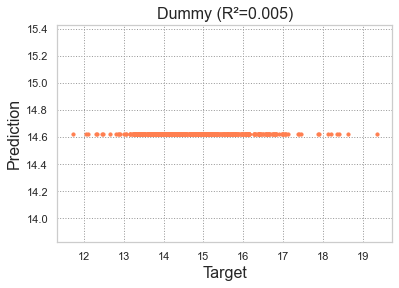

-------------------- LinearRegression --------------------
Model    LinearRegression
RMSLE            0.043348
R²               0.619477
Time             0.002813
hue                   OHE
Name: 21, dtype: object


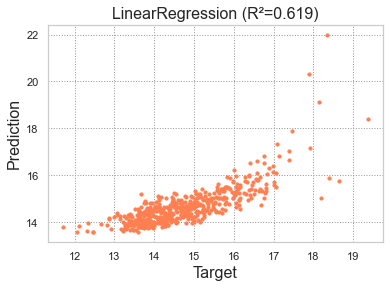

-------------------- ElasticNet --------------------
Model    ElasticNet
RMSLE      0.043471
R²         0.616841
Time       0.141578
hue             OHE
Name: 22, dtype: object


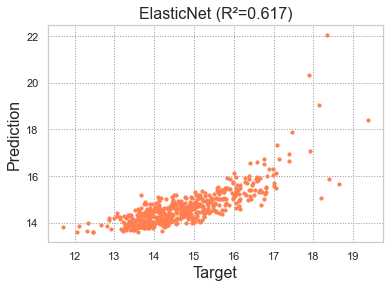

-------------------- LinearSVR --------------------
Model    LinearSVR
RMSLE      0.04306
R²        0.561237
Time      0.071239
hue            OHE
Name: 23, dtype: object


C:\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


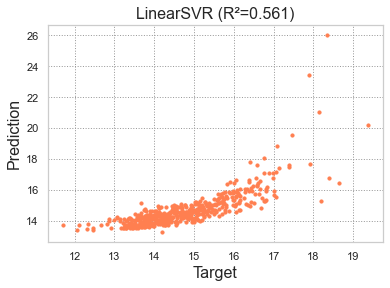

-------------------- KNN (CV) --------------------
Model    KNN (CV)
RMSLE    0.035029
R²        0.75759
Time     0.177144
hue           OHE
Name: 24, dtype: object


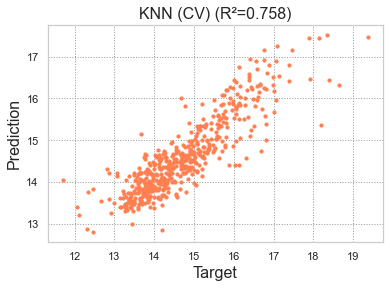

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 6}
-------------------- KernelRidge (CV) --------------------


C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.01894952 -0.00393141 -0.00336959         nan -0.01885871 -0.25366174
 -0.00262869 -0.02044039         nan -0.01920142]
  warnings.warn(


Model    KernelRidge (CV)
RMSLE            0.053521
R²                0.43156
Time              16.9522
hue                   OHE
Name: 25, dtype: object


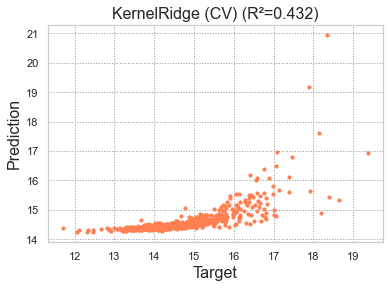

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'kernel': 'sigmoid', 'gamma': 0.0001, 'alpha': 0.1778279410038923}
-------------------- SVR (CV) --------------------


C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.00333326 -0.00337409         nan -0.00844158 -0.00363129 -0.00844158
         nan -0.00844158         nan         nan]
  warnings.warn(


Model    SVR (CV)
RMSLE    0.057566
R²       0.136789
Time     1.762251
hue           OHE
Name: 26, dtype: object


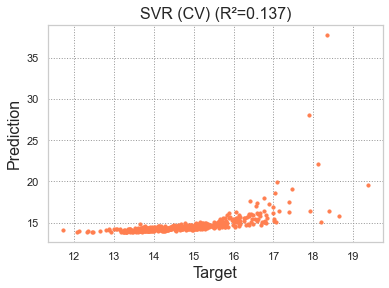

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'kernel': 'sigmoid', 'gamma': 0.002154434690031882, 'epsilon': 0.001, 'C': 0.5994842503189409}
-------------------- MLPR (CV) --------------------
Model    MLPR (CV)
RMSLE     0.031772
R²         0.80303
Time     31.185873
hue            OHE
Name: 27, dtype: object


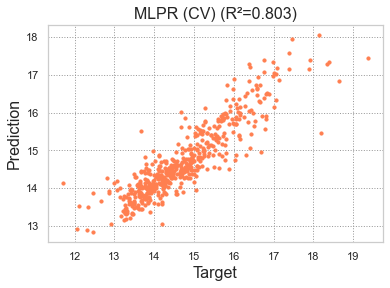

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'random_state': 3, 'max_iter': 1000, 'hidden_layer_sizes': (15, 10, 5), 'alpha': 1e-07}
-------------------- RandomForest (CV) --------------------
Model    RandomForest (CV)
RMSLE             0.032622
R²                0.794779
Time             33.469543
hue                    OHE
Name: 28, dtype: object


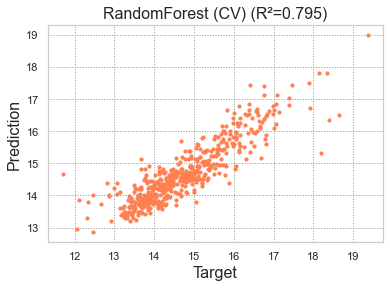

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'random_state': 0, 'n_estimators': 900}
-------------------- Feature importances --------------------


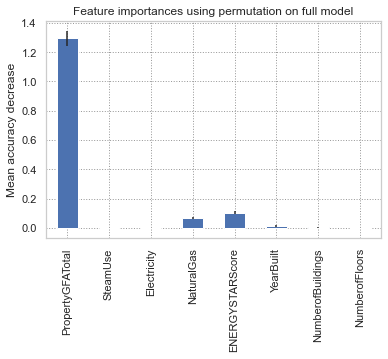

-------------------- GradientBoostingRegressor (CV) --------------------


C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.00093408 -0.0010623  -0.00435449 -0.00238748 -0.00435075 -0.00410686
         nan -0.00436809         nan -0.00301381]
  warnings.warn(


Model    GradientBoostingRegressor (CV)
RMSLE                          0.031078
R²                             0.813568
Time                           9.737803
hue                                 OHE
Name: 29, dtype: object


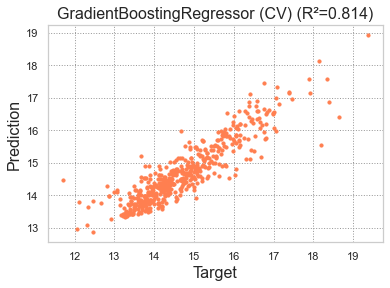

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'random_state': 0, 'n_estimators': 900, 'max_depth': 3, 'learning_rate': 0.01}


In [84]:
Perfs = baseline(Perfs)
Perfs = linearModels(Perfs)
Perfs = nonLinearModel(Perfs)
Perfs = ensembles(Perfs)

## 5.4- Evaluation des Modèles

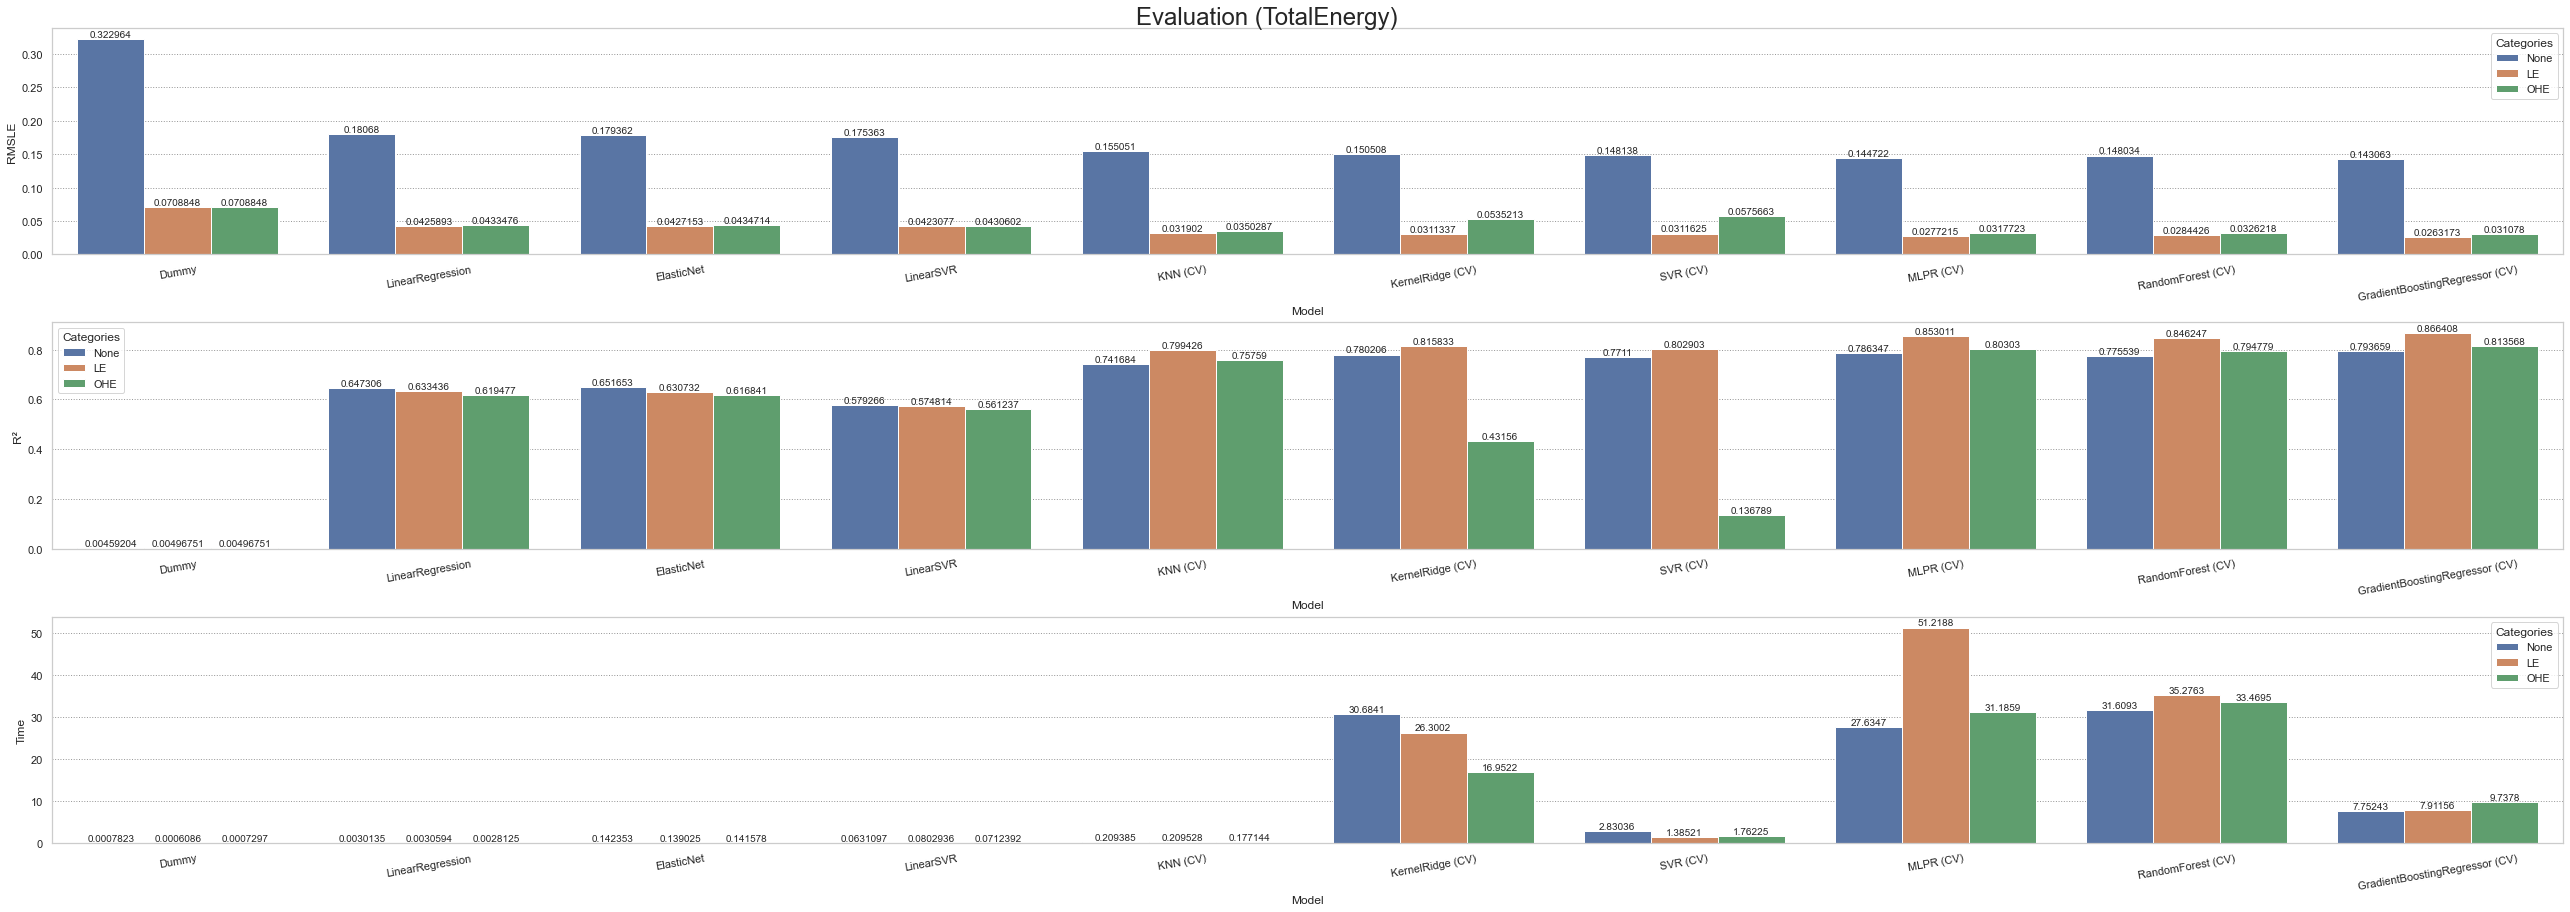

In [85]:
display_scores(Perfs, y, hue='Categories')